In [1]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load dataset
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



2024-10-30 19:32:17.612511: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-10-30 19:32:18.341073: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training set size: 2448


2024-10-30 19:32:18.652272: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


2024-10-30 19:32:21.406089: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


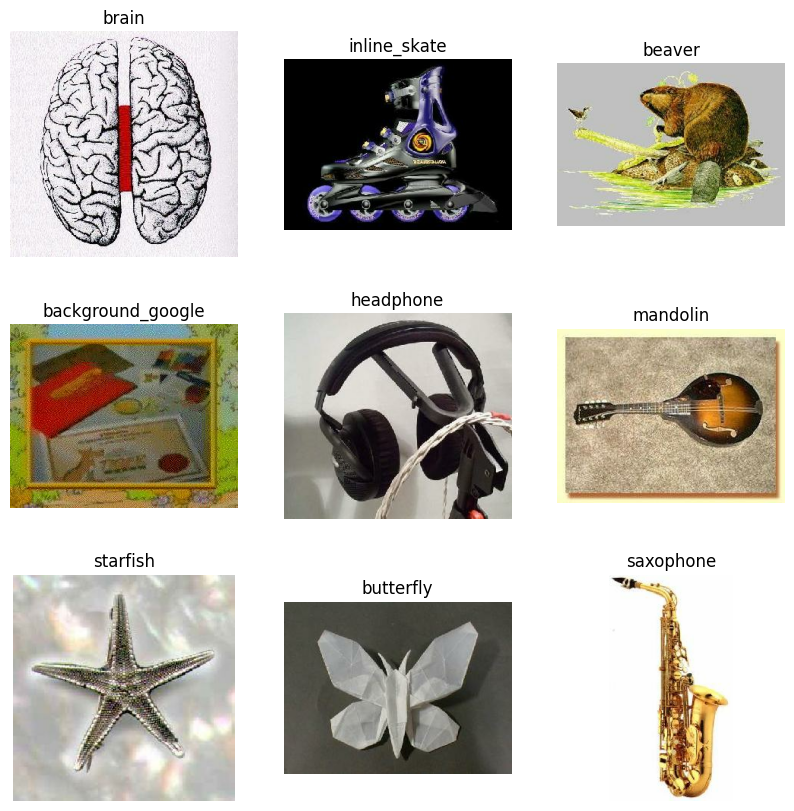

In [3]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

In [4]:
# Counting instances per class
import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(4): 24, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int

In [5]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

Training set size after filtering: 2424


2024-10-30 19:32:24.333170: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation set size after filtering: 606
Test set size after filtering: 5647
Image shape: (297, 300, 3)
Label: 10


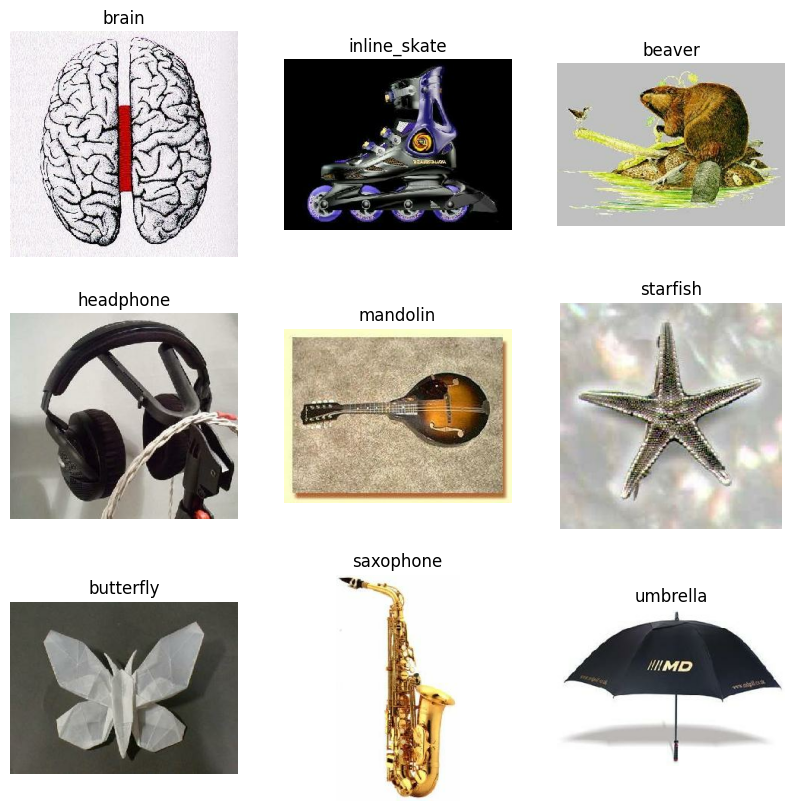

Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int64(69): 24, np.in

In [6]:
# Get class names and find the index of "google_background"
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# Define a filter function to exclude "google_background"
def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# Apply the filter to each dataset split
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# Verifying the dataset sizes after filtering
print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

# Print the first image and label from the filtered training set
for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

# Visualize a few filtered images
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

# Counting instances per class after filtering
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)

In [7]:
# Resize images
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

# Normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

# Edge detection
def edge_detection(image, label):
    # Convert image to grayscale
    image_gray = tf.image.rgb_to_grayscale(image)
    # Add batch dimension to the grayscale image
    image_gray = tf.expand_dims(image_gray, axis=0)
    # Apply Sobel edge detection
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    # Combine the edges
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    # Remove the extra dimension
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomZoom(0.25),
    tf.keras.layers.RandomTranslation(0.25, 0.25)
])

# Function to apply augmentation
def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

# Function to expand training data with augmentation
def expand_training_data(train_data, n_augments):
    augmented_datasets = [train_data]  # Original data

    for _ in range(n_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # Concatenate the original and augmented datasets
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

# Generate expanded training data
train_data = expand_training_data(train_data, n_augments=1)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

# Apply batching and prefetching without one-hot encoding
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [8]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 151
Validation set size: 18


2024-10-30 19:32:44.693981: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test set size: 176
Image shape: (32, 128, 128, 1)
Label: [ 2 31 66 53  0 31 91 78 92 58 26 56 98 52 88 28 57 74 12 90 41  1 10  8
 24 57  7 34 48  3 15 48]


In [9]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 64s 358ms/step - accuracy: 0.0174 - loss: 4.6181

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 373ms/step - accuracy: 0.0175 - loss: 4.6174 - val_accuracy: 0.0461 - val_loss: 4.1172
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 61s 368ms/step - accuracy: 0.0783 - loss: 4.1994 - val_accuracy: 0.1678 - val_loss: 3.5871
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 61s 375ms/step - accuracy: 0.1859 - loss: 3.6499 - val_accuracy: 0.2253 - val_loss: 3.2271
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 380ms/step - accuracy: 0.2910 - loss: 3.1736 - val_accuracy: 0.2516 - val_loss: 3.3063
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 387ms/step - accuracy: 0.3846 - loss: 2.8154 - val_accuracy: 0.2730 - val_loss: 3.3774
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 399ms/step - accuracy: 0.4548 - loss: 2.4794 - val_accuracy: 0.2862 - val_loss: 3.5542
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 353ms/step - accuracy: 0.4878 - loss: 2.3255 - val_accuracy: 0.2714 - val_loss: 3.9655
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5228 - loss: 2.1755

2024-10-30 19:41:05.209809: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 326ms/step - accuracy: 0.5228 - loss: 2.1755 - val_accuracy: 0.2796 - val_loss: 4.5664
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 57s 342ms/step - accuracy: 0.5302 - loss: 2.1346 - val_accuracy: 0.2681 - val_loss: 5.2876
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 56s 345ms/step - accuracy: 0.5307 - loss: 2.1101 - val_accuracy: 0.2780 - val_loss: 4.8843


176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step
Accuracy: 41.23%


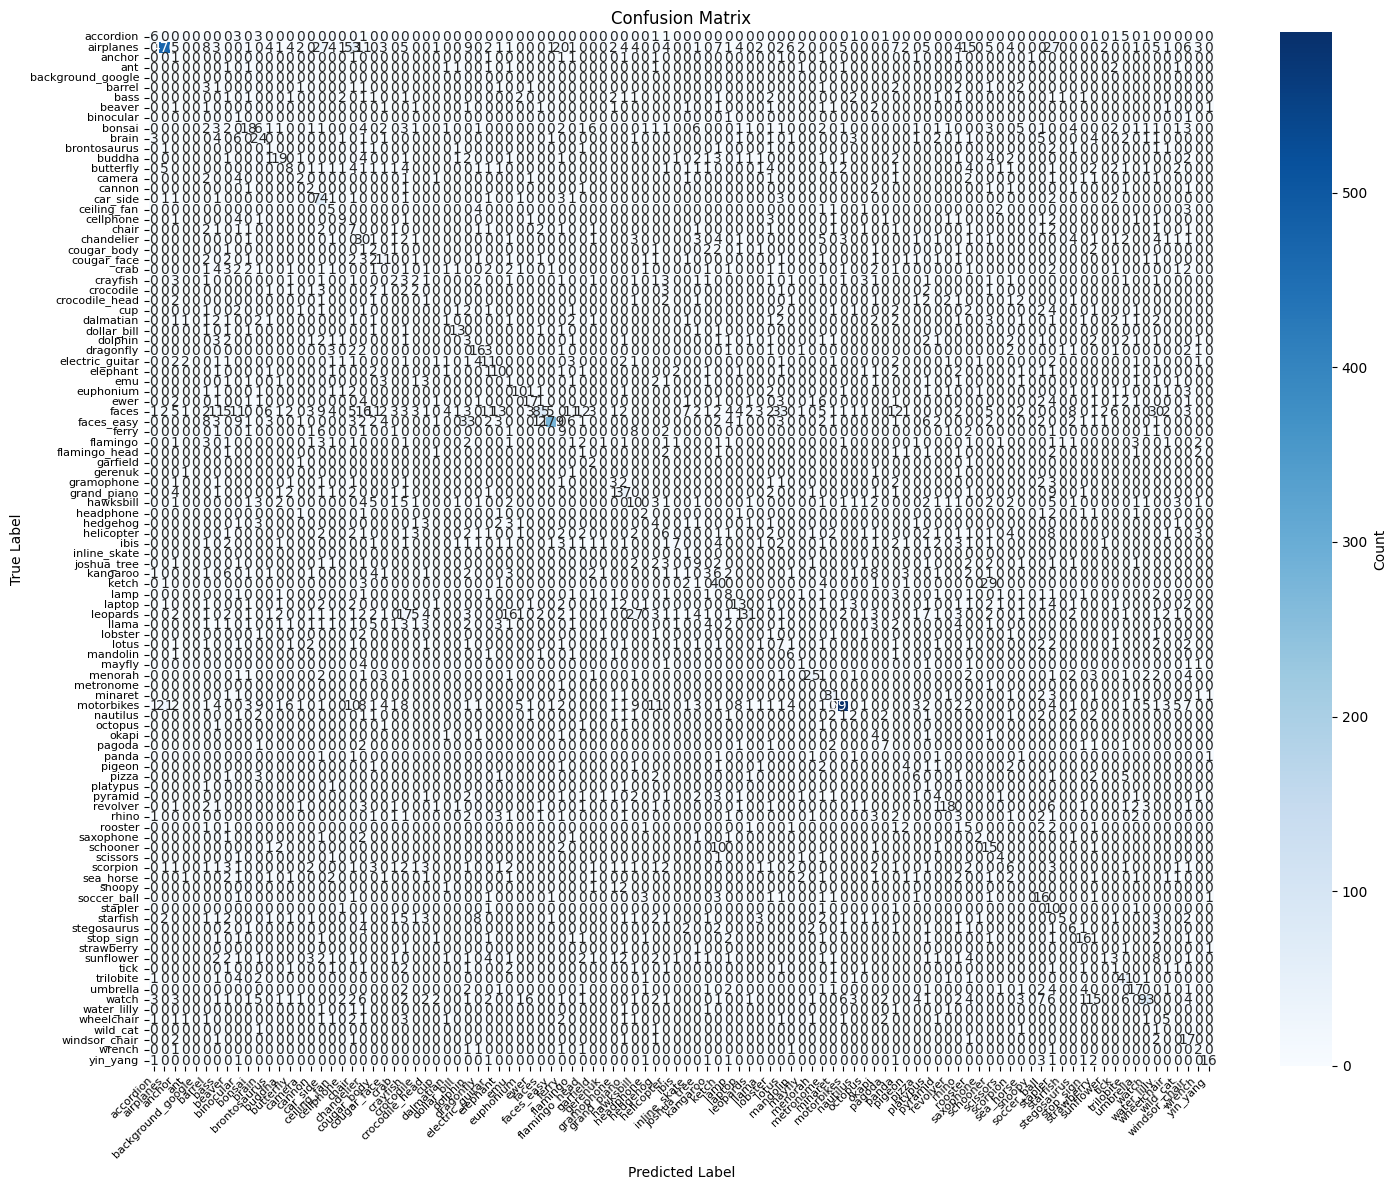

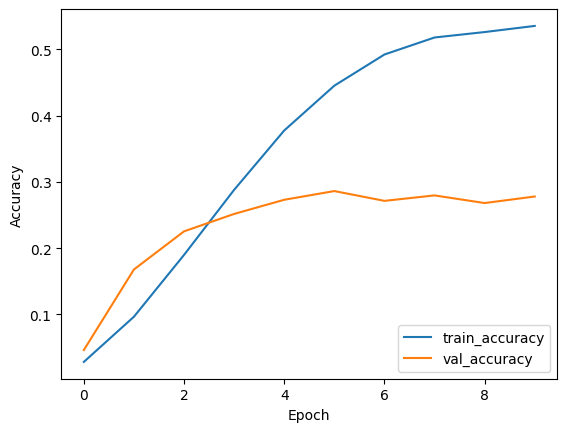

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_results():
    # Extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # Generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy manually
    accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate confusion matrix
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(test_labels, predicted_classes):
        confusion_matrix[true, pred] += 1

    # Plot confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 57s 344ms/step - accuracy: 0.0103 - loss: 4.6258

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 359ms/step - accuracy: 0.0103 - loss: 4.6255 - val_accuracy: 0.0197 - val_loss: 4.3545
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 60s 362ms/step - accuracy: 0.0285 - loss: 4.5304 - val_accuracy: 0.0625 - val_loss: 4.1435
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 58s 345ms/step - accuracy: 0.0852 - loss: 4.2550 - val_accuracy: 0.1250 - val_loss: 3.8014
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 55s 328ms/step - accuracy: 0.1498 - loss: 3.9080 - val_accuracy: 0.1743 - val_loss: 3.5647
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 58s 346ms/step - accuracy: 0.2078 - loss: 3.6789 - val_accuracy: 0.2089 - val_loss: 3.4003
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 405ms/step - accuracy: 0.2580 - loss: 3.4580 - val_accuracy: 0.2566 - val_loss: 3.2756
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 378ms/step - accuracy: 0.3081 - loss: 3.2807 - val_accuracy: 0.2434 - val_loss: 3.3130
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.3484 - loss: 3.1717 - val

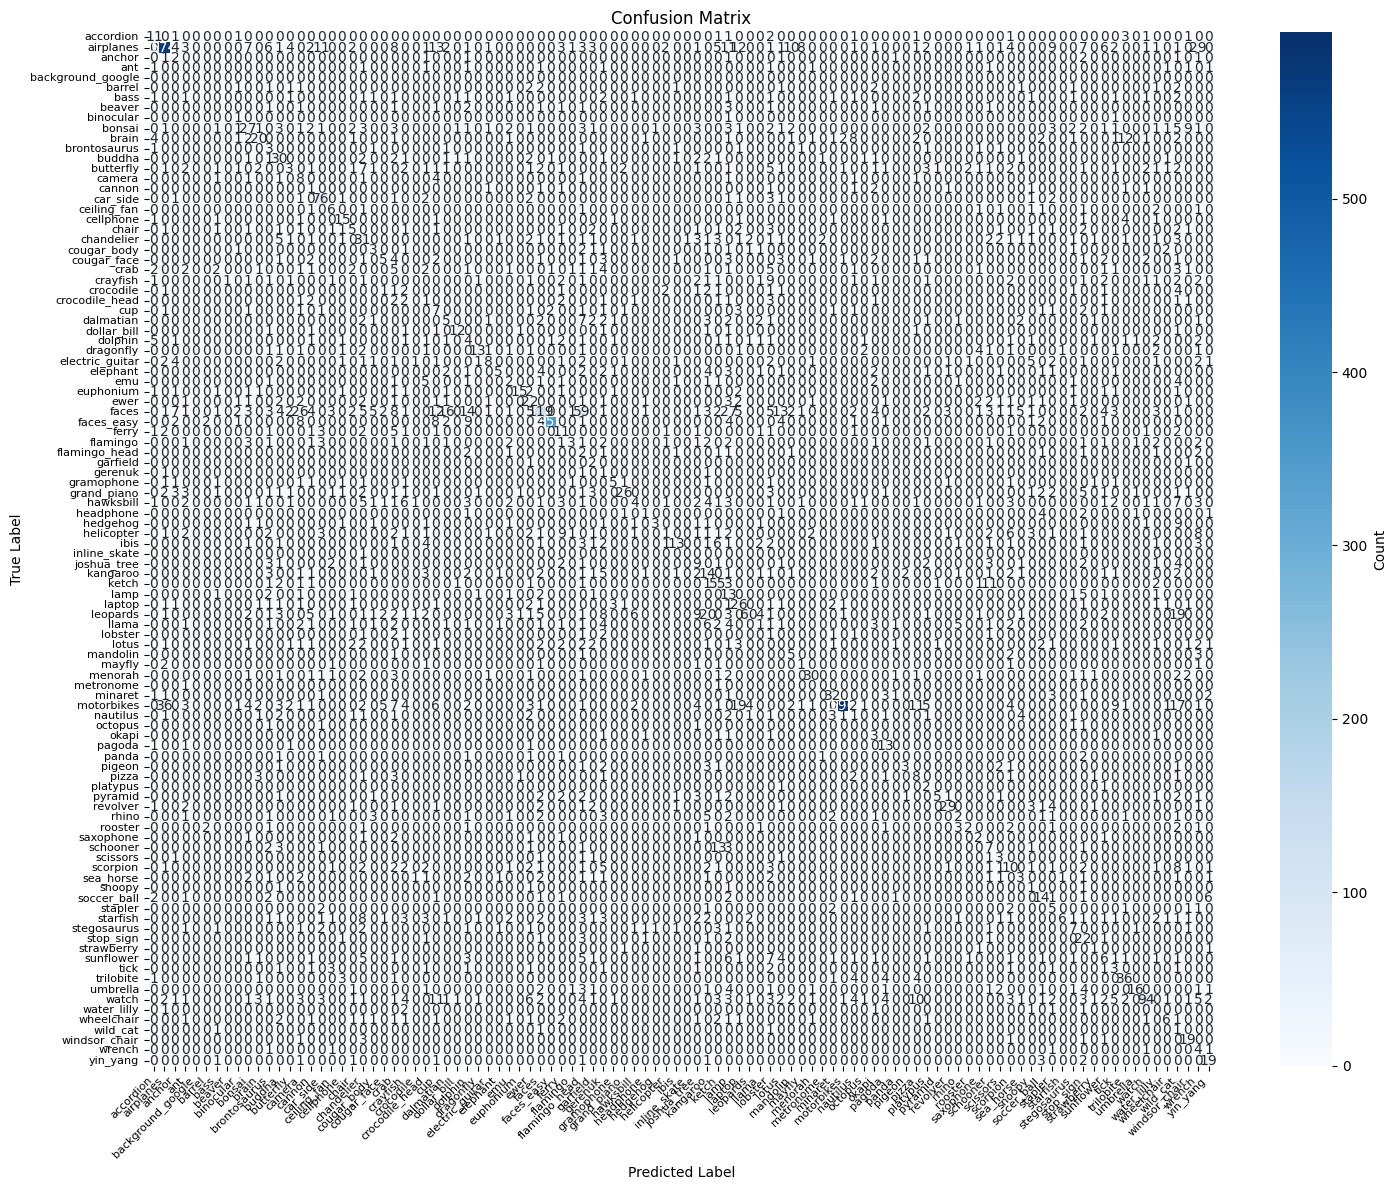

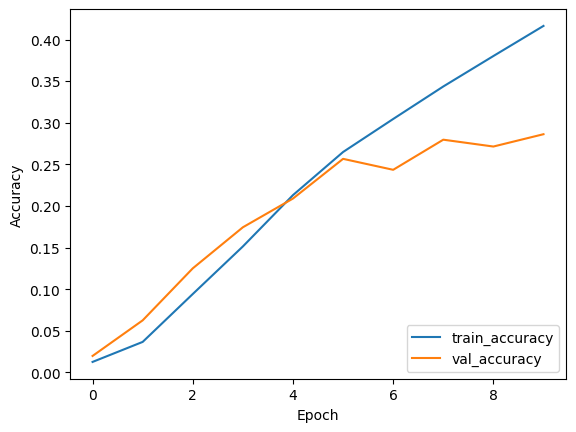

In [11]:

# model with slower learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()



Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 70s 421ms/step - accuracy: 0.0074 - loss: 6.3591

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 72s 437ms/step - accuracy: 0.0074 - loss: 6.3499 - val_accuracy: 0.0033 - val_loss: 4.3923
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 378ms/step - accuracy: 0.0121 - loss: 4.6162 - val_accuracy: 0.0016 - val_loss: 4.4009
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.0137 - loss: 4.6160

2024-10-30 19:57:33.861252: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 360ms/step - accuracy: 0.0137 - loss: 4.6158 - val_accuracy: 0.0033 - val_loss: 4.4046
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 380ms/step - accuracy: 0.0132 - loss: 4.6143 - val_accuracy: 0.0033 - val_loss: 4.4066
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 387ms/step - accuracy: 0.0089 - loss: 4.6158 - val_accuracy: 0.0033 - val_loss: 4.4086
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 65s 391ms/step - accuracy: 0.0117 - loss: 4.6160 - val_accuracy: 0.0033 - val_loss: 4.4071
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 388ms/step - accuracy: 0.0071 - loss: 4.6158 - val_accuracy: 0.0016 - val_loss: 4.4066
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 60s 355ms/step - accuracy: 0.0104 - loss: 4.6131 - val_accuracy: 0.0016 - val_loss: 4.4065
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.0109 - loss: 4.6168 - val_accuracy: 0.0016 - val_loss: 4.4081
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 378ms/step - accuracy: 0.0103 - loss: 4.6158 - va

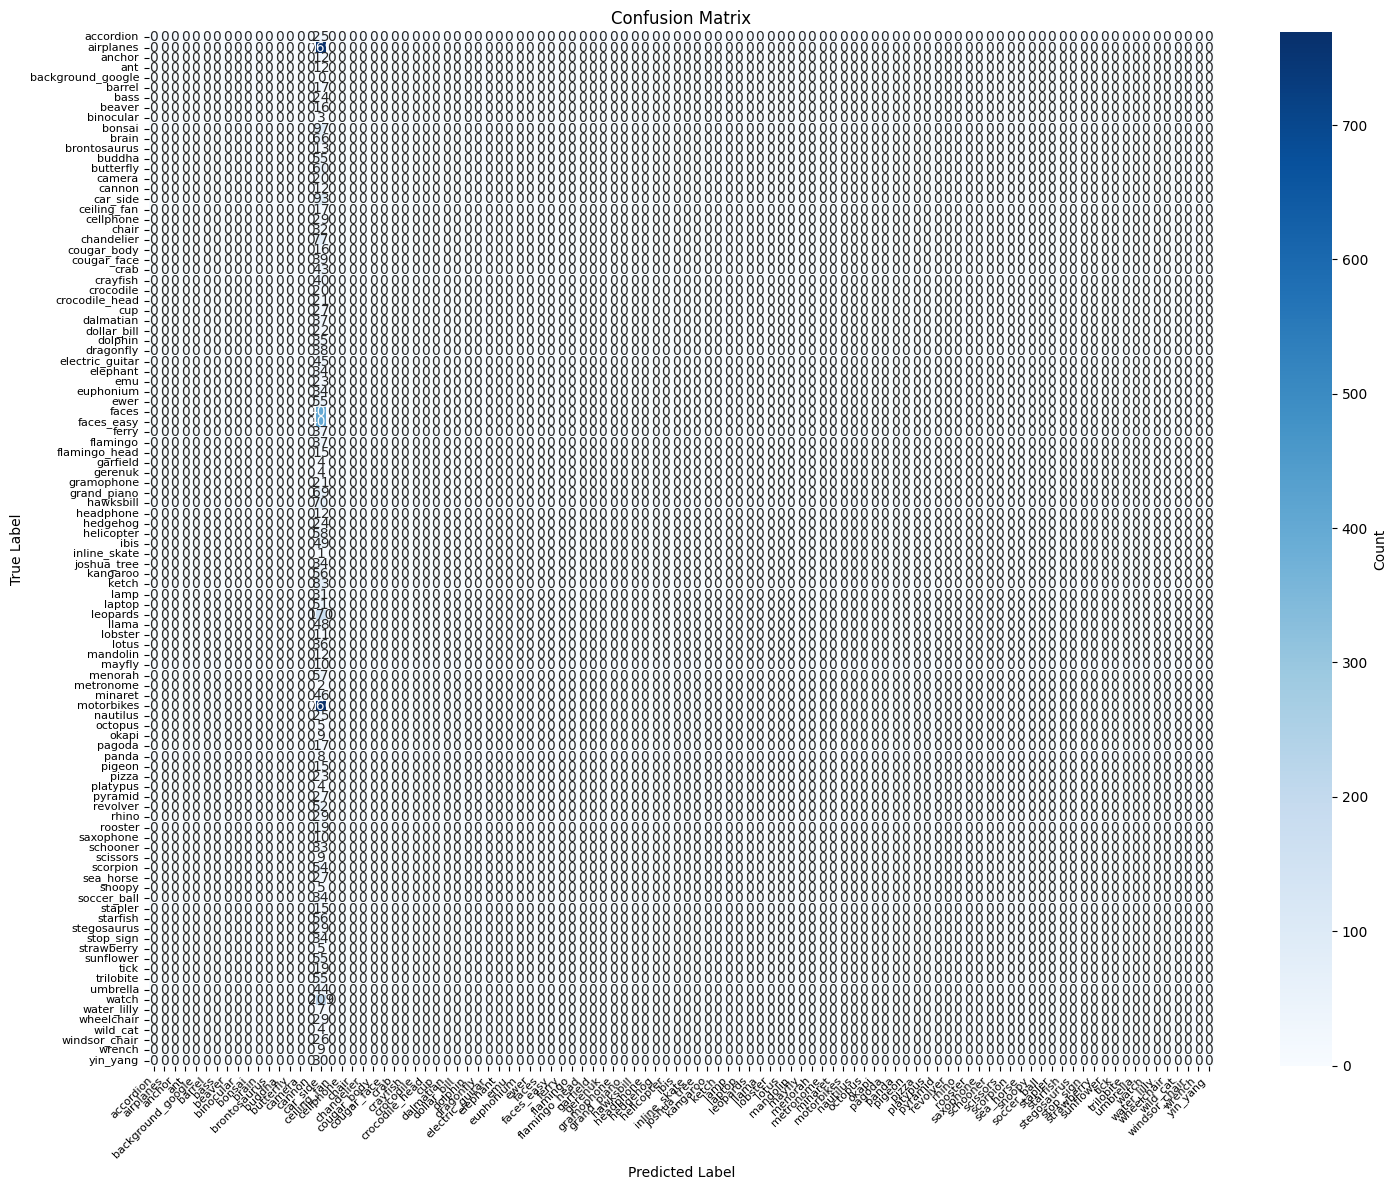

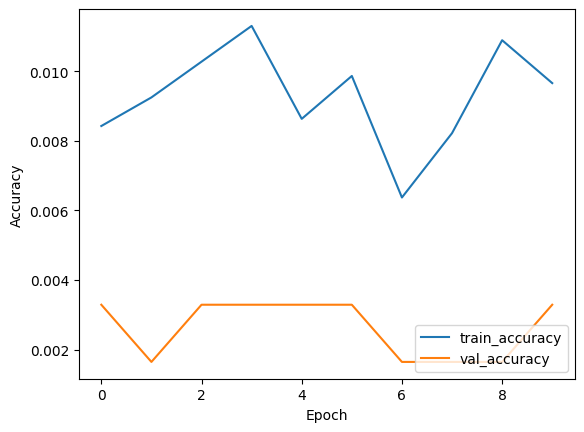

In [12]:

# model with faster learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 53s 300ms/step - accuracy: 0.0100 - loss: 4.6248

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.0100 - loss: 4.6244 - val_accuracy: 0.0576 - val_loss: 4.1051
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 229ms/step - accuracy: 0.0673 - loss: 4.3195 - val_accuracy: 0.1793 - val_loss: 3.5977
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 261ms/step - accuracy: 0.1597 - loss: 3.8425 - val_accuracy: 0.2368 - val_loss: 3.2895
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 266ms/step - accuracy: 0.2687 - loss: 3.3113 - val_accuracy: 0.2714 - val_loss: 3.1785
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 252ms/step - accuracy: 0.3593 - loss: 2.8485 - val_accuracy: 0.2878 - val_loss: 3.2894
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.4435 - loss: 2.5535 - val_accuracy: 0.2730 - val_loss: 3.7780
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.4697 - loss: 2.4036 - val_accuracy: 0.2911 - val_loss: 3.9636
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 235ms/step - accuracy: 0.4977 - loss: 2.2823 - val

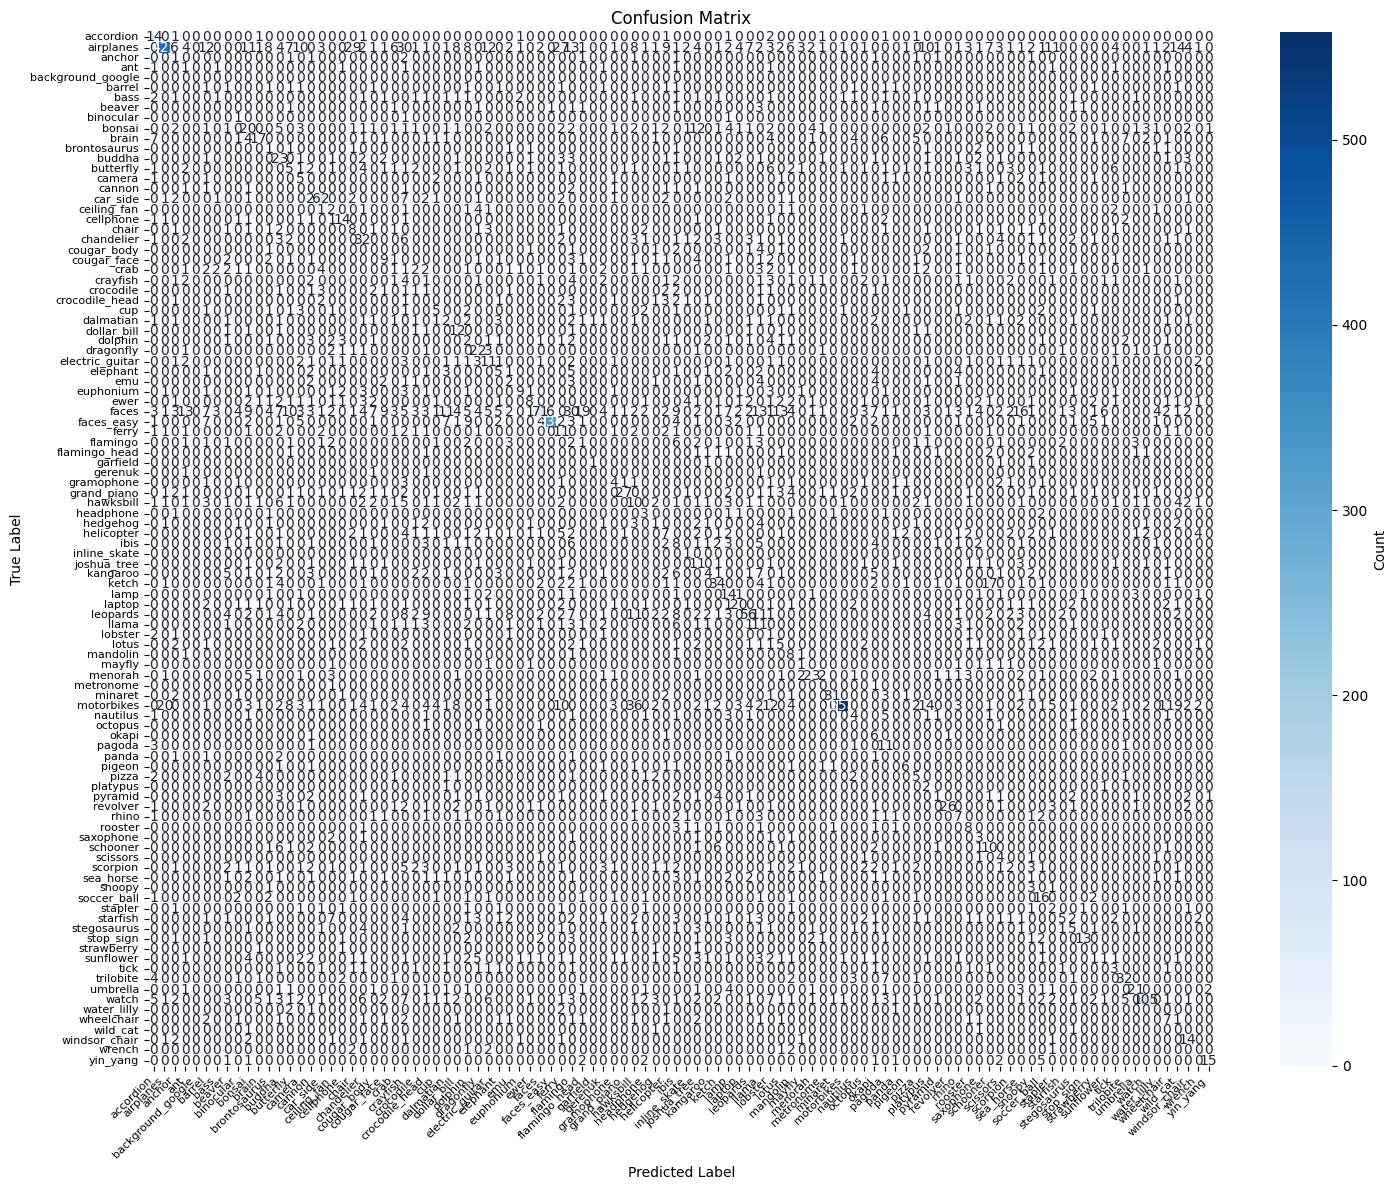

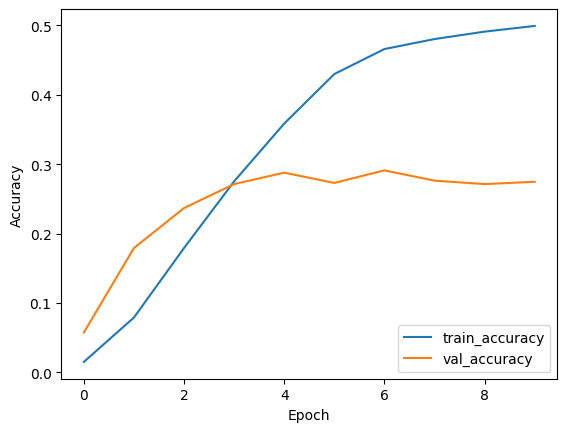

In [13]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 44s 254ms/step - accuracy: 0.0127 - loss: 4.6359

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 46s 266ms/step - accuracy: 0.0127 - loss: 4.6355 - val_accuracy: 0.0280 - val_loss: 4.2789
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 260ms/step - accuracy: 0.0468 - loss: 4.3949 - val_accuracy: 0.1036 - val_loss: 3.8757
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 255ms/step - accuracy: 0.1211 - loss: 3.9919 - val_accuracy: 0.1924 - val_loss: 3.5160
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.1929 - loss: 3.6277 - val_accuracy: 0.2434 - val_loss: 3.2618
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 255ms/step - accuracy: 0.2706 - loss: 3.2620 - val_accuracy: 0.2500 - val_loss: 3.2058
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.3268 - loss: 3.0329 - val_accuracy: 0.2845 - val_loss: 3.3449
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.3668 - loss: 2.7950 - val_accuracy: 0.2566 - val_loss: 3.3023
Epoch 8/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.3942 - loss: 2.6775 - val

2024-10-30 20:24:15.118271: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.4975 - loss: 2.2279 - val_accuracy: 0.2747 - val_loss: 3.9075
Epoch 15/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 265ms/step - accuracy: 0.5039 - loss: 2.2174 - val_accuracy: 0.2747 - val_loss: 4.3254
Epoch 16/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 235ms/step - accuracy: 0.5058 - loss: 2.2140 - val_accuracy: 0.2878 - val_loss: 4.5184
Epoch 17/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 265ms/step - accuracy: 0.5138 - loss: 2.1669 - val_accuracy: 0.2845 - val_loss: 4.0888
Epoch 18/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 46s 279ms/step - accuracy: 0.5072 - loss: 2.1769 - val_accuracy: 0.2829 - val_loss: 4.3608
Epoch 19/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.4905 - loss: 2.2335 - val_accuracy: 0.2944 - val_loss: 4.5889
Epoch 20/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - accuracy: 0.5158 - loss: 2.1352 - val_accuracy: 0.2944 - val_loss: 4.5957
Epoch 21/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.5196 - loss: 2.107

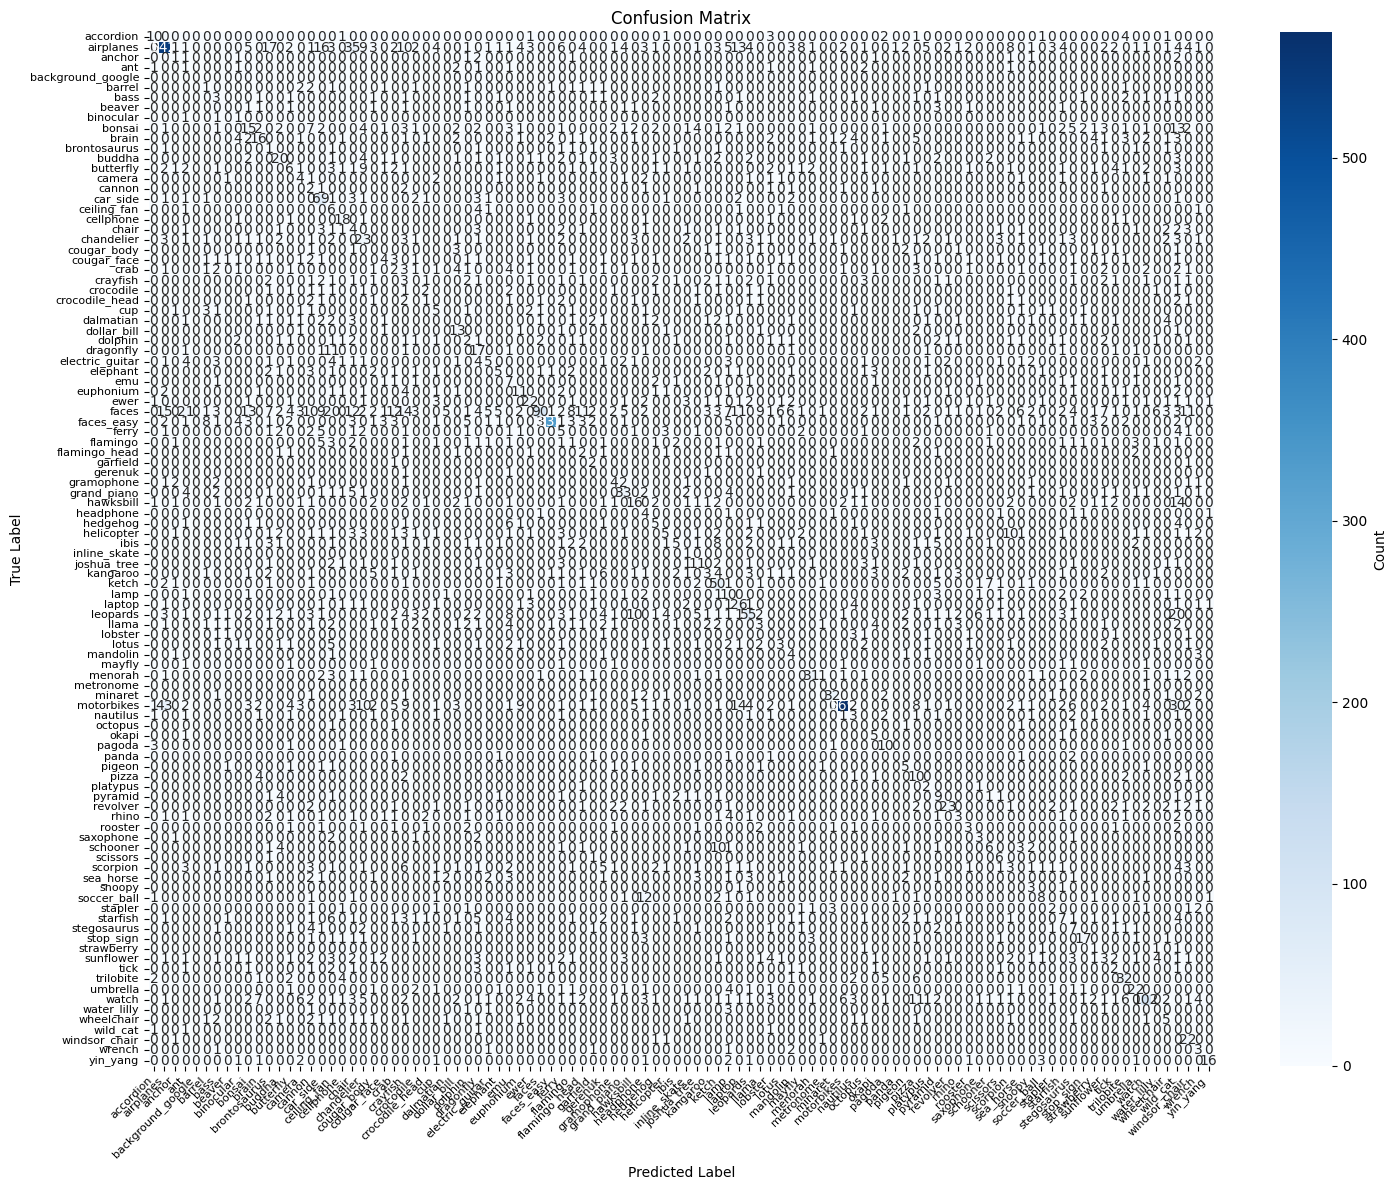

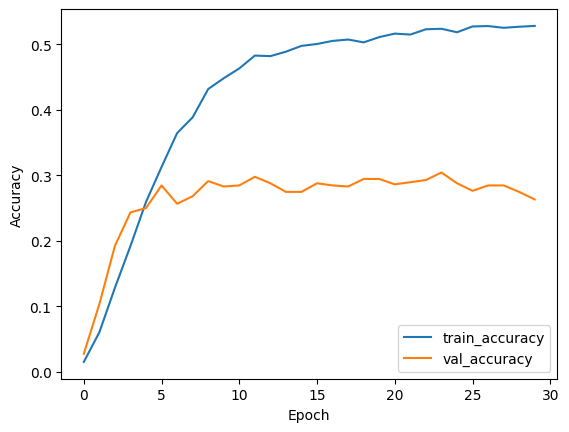

In [14]:

# model with dropout 0.2 + 30 epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=30, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 0.0072 - loss: 4.6703 - val_accuracy: 0.0033 - val_loss: 4.3810
Epoch 2/30


/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.0093 - loss: 4.6204 - val_accuracy: 0.0197 - val_loss: 4.3372
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.0245 - loss: 4.4642 - val_accuracy: 0.0444 - val_loss: 4.2287
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - accuracy: 0.0376 - loss: 4.3812 - val_accuracy: 0.0855 - val_loss: 3.9991
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 262ms/step - accuracy: 0.0774 - loss: 4.2301 - val_accuracy: 0.1562 - val_loss: 3.7020
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.0777 - loss: 4.1143 - val_accuracy: 0.1595 - val_loss: 3.6472
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 60s 334ms/step - accuracy: 0.1508 - loss: 3.7717 - val_accuracy: 0.1661 - val_loss: 3.5111
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.1600 - loss: 3.8111 - val_accuracy: 0.2418 - val_loss: 3.2180
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.1798 - loss: 3.5794 - val_accuracy: 0.2336 -

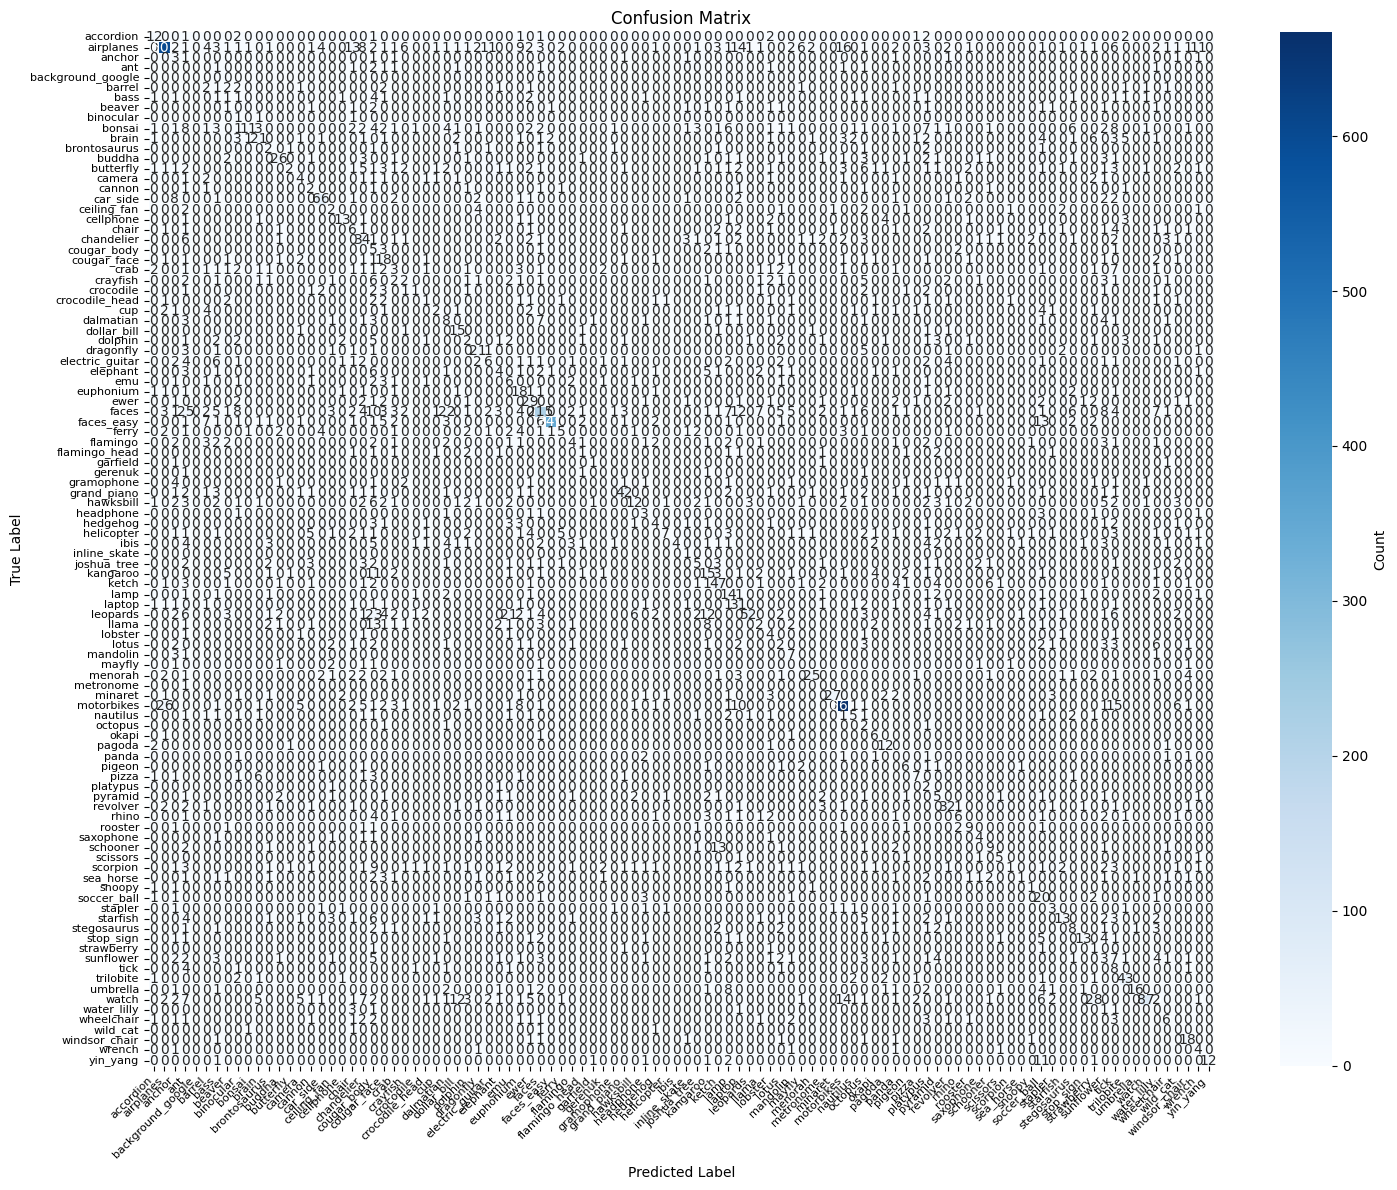

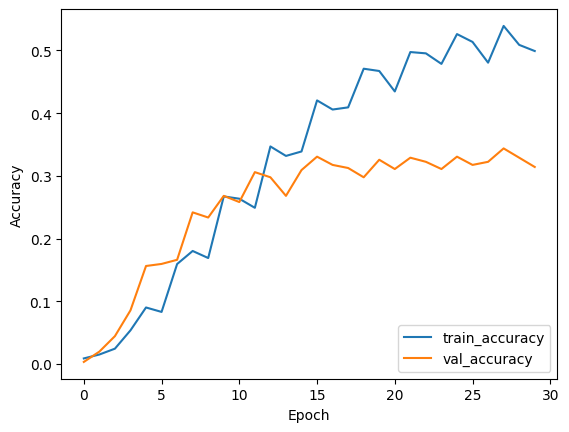

In [15]:
def create_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(128, 128, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))   

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

model = create_model()
history = model.fit(train_data, steps_per_epoch=60, epochs=30, validation_data=val_data, validation_steps=20)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 64s 374ms/step - accuracy: 0.0060 - loss: 4.6272

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 390ms/step - accuracy: 0.0060 - loss: 4.6270 - val_accuracy: 0.0016 - val_loss: 4.3725
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.0168 - loss: 4.5656 - val_accuracy: 0.0378 - val_loss: 4.2059
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 443ms/step - accuracy: 0.0328 - loss: 4.3685 - val_accuracy: 0.0559 - val_loss: 4.0660
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 356ms/step - accuracy: 0.0668 - loss: 4.1605 - val_accuracy: 0.1168 - val_loss: 3.7460
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 390ms/step - accuracy: 0.1218 - loss: 3.9261 - val_accuracy: 0.1891 - val_loss: 3.4631
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 419ms/step - accuracy: 0.1692 - loss: 3.6508 - val_accuracy: 0.2319 - val_loss: 3.1801
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 411ms/step - accuracy: 0.2113 - loss: 3.3957 - val_accuracy: 0.2845 - val_loss: 2.9897
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 65s 400ms/step - accuracy: 0.2880 - loss: 3.1058 - val

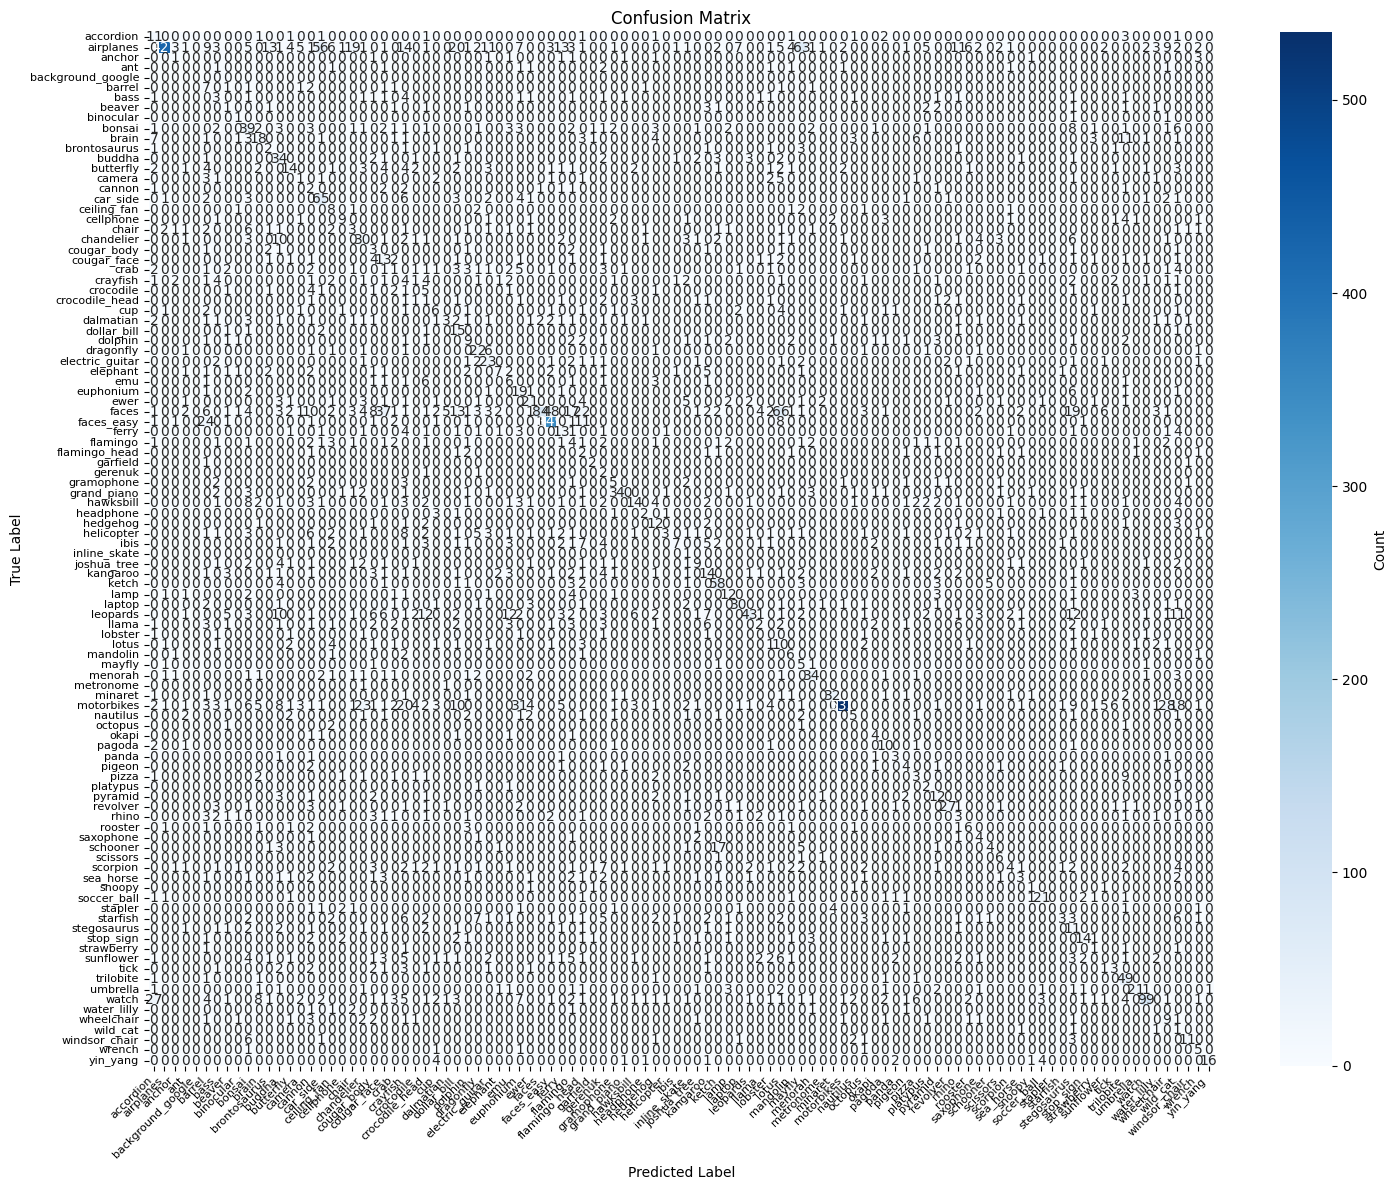

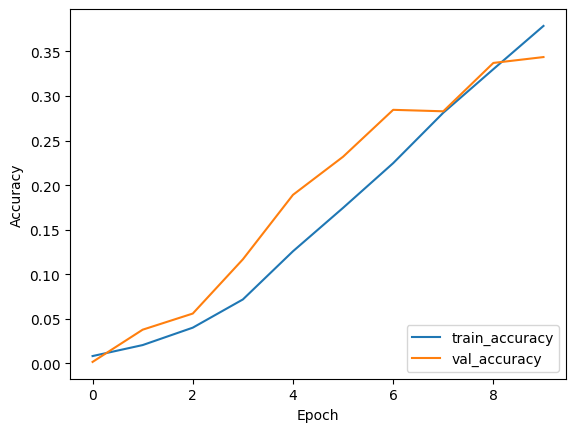

In [16]:
# model with more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 81s 484ms/step - accuracy: 0.0101 - loss: 4.6304

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 503ms/step - accuracy: 0.0101 - loss: 4.6302 - val_accuracy: 0.0033 - val_loss: 4.3845
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 86s 520ms/step - accuracy: 0.0123 - loss: 4.6181 - val_accuracy: 0.0164 - val_loss: 4.3377
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 481ms/step - accuracy: 0.0207 - loss: 4.4721 - val_accuracy: 0.0411 - val_loss: 4.1467
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 492ms/step - accuracy: 0.0394 - loss: 4.2977 - val_accuracy: 0.0609 - val_loss: 4.0263
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 75s 460ms/step - accuracy: 0.0607 - loss: 4.1634 - val_accuracy: 0.0855 - val_loss: 3.8725
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 76s 468ms/step - accuracy: 0.0863 - loss: 4.0278 - val_accuracy: 0.1316 - val_loss: 3.7021
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 72s 451ms/step - accuracy: 0.1098 - loss: 3.8398 - val_accuracy: 0.1809 - val_loss: 3.5027
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 388ms/step - accuracy: 0.1462 - loss: 3.6816 - val

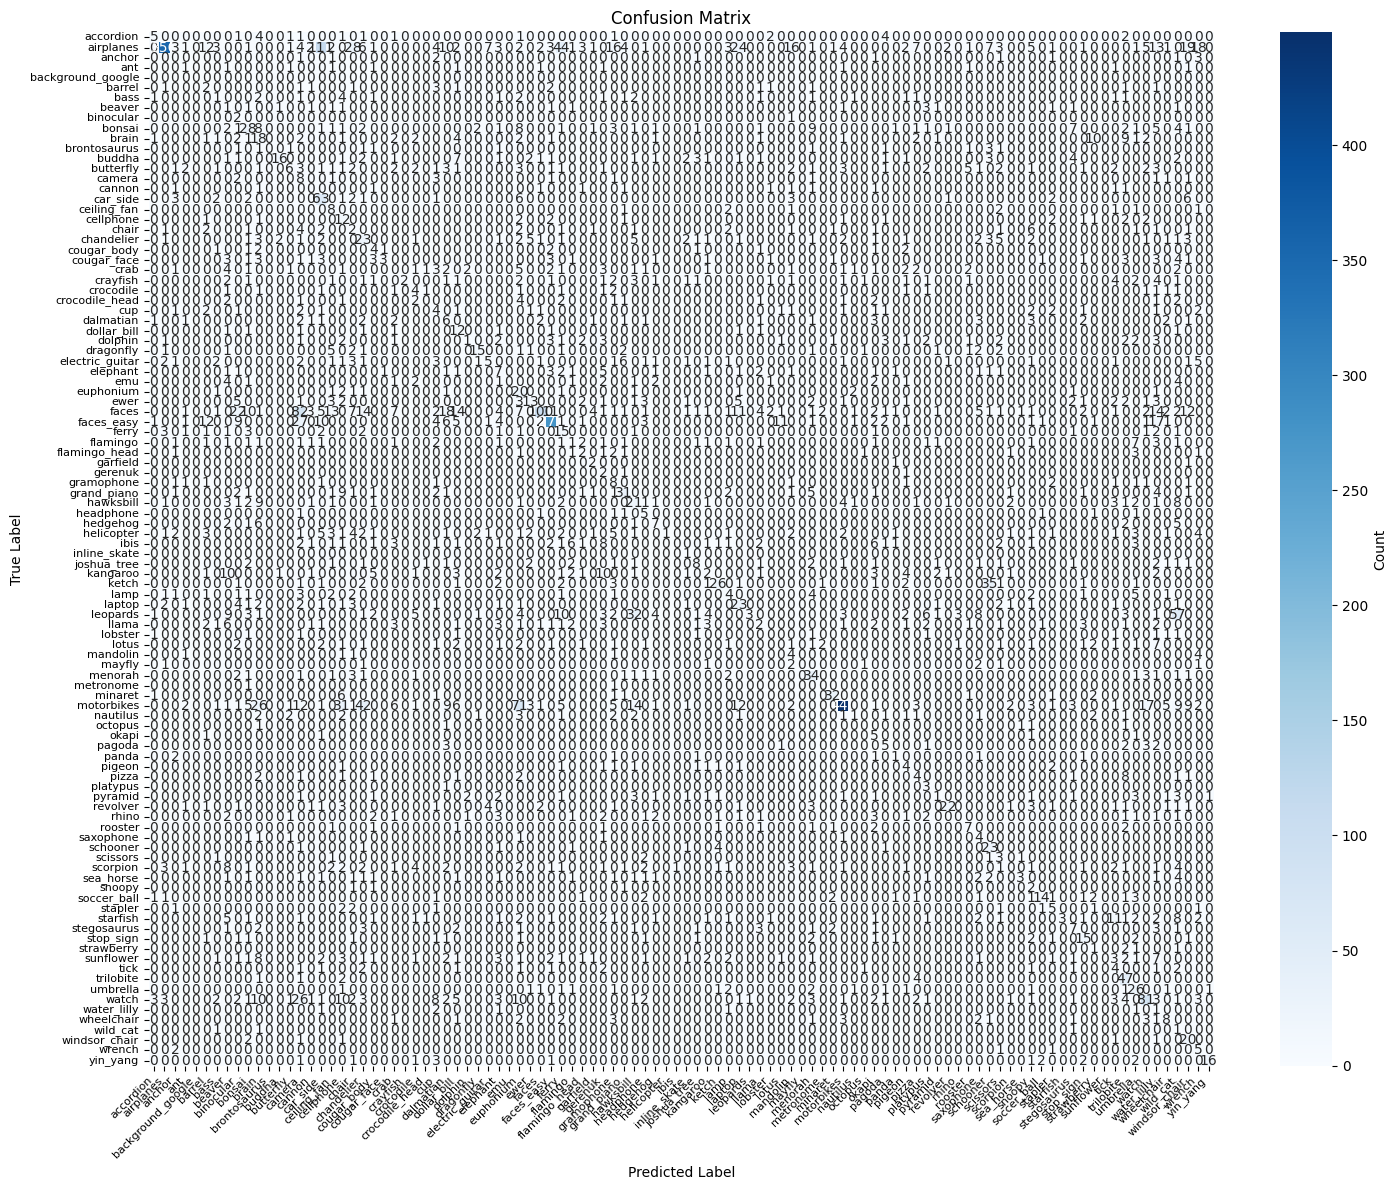

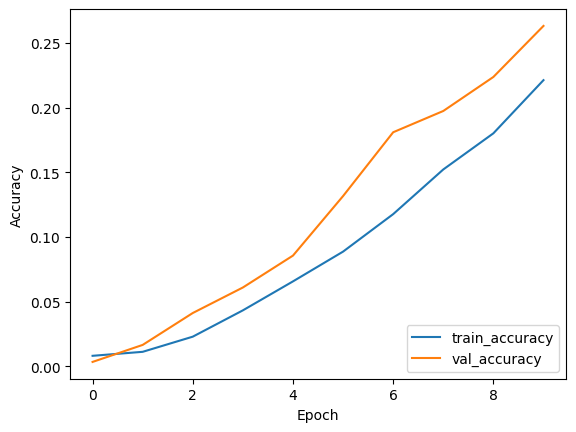

In [17]:
# model with more dropout and more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 27s 133ms/step - accuracy: 0.0095 - loss: 4.6274

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 138ms/step - accuracy: 0.0095 - loss: 4.6271 - val_accuracy: 0.0181 - val_loss: 4.2830
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.0321 - loss: 4.4511 - val_accuracy: 0.0822 - val_loss: 3.9716
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.0871 - loss: 4.1616 - val_accuracy: 0.1414 - val_loss: 3.6656
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 170ms/step - accuracy: 0.1243 - loss: 3.9461 - val_accuracy: 0.2105 - val_loss: 3.3600
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.1647 - loss: 3.6955 - val_accuracy: 0.2467 - val_loss: 3.0977
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2025 - loss: 3.5227

2024-10-30 21:14:05.762728: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.2026 - loss: 3.5223 - val_accuracy: 0.2812 - val_loss: 3.0050
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.2458 - loss: 3.3056 - val_accuracy: 0.3076 - val_loss: 2.8338
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.2879 - loss: 3.0617 - val_accuracy: 0.3240 - val_loss: 2.7365
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.3142 - loss: 2.9413 - val_accuracy: 0.3470 - val_loss: 2.6799
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.3629 - loss: 2.7797 - val_accuracy: 0.3306 - val_loss: 2.7652
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step
Accuracy: 47.23%


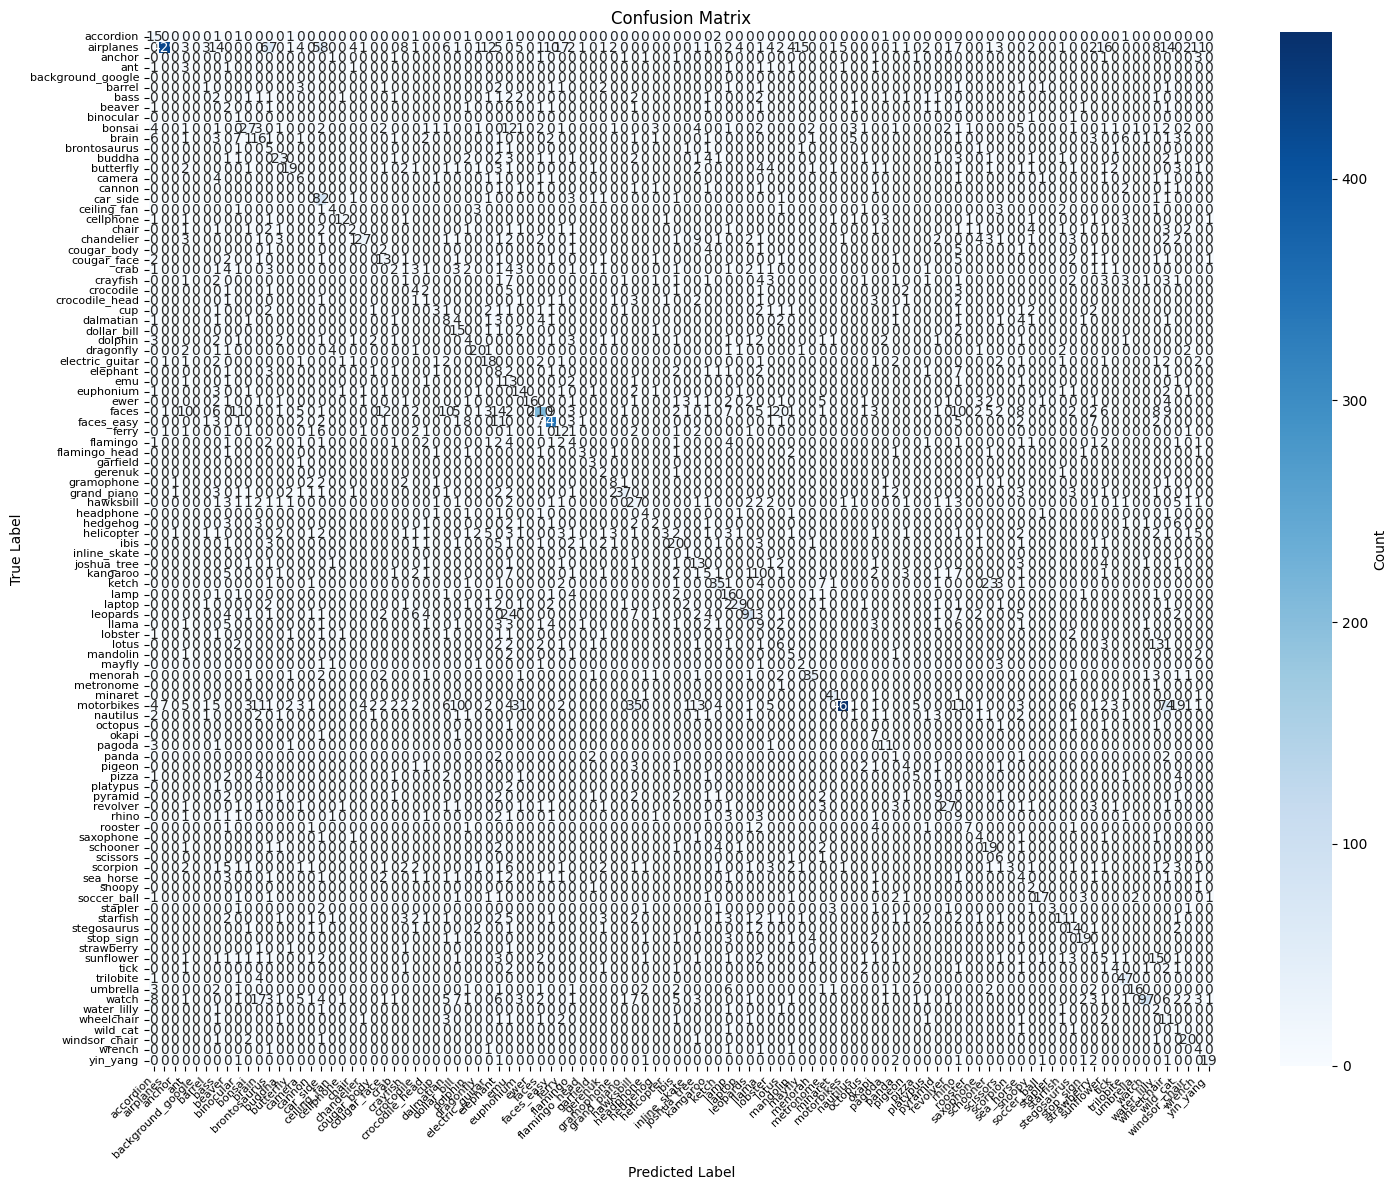

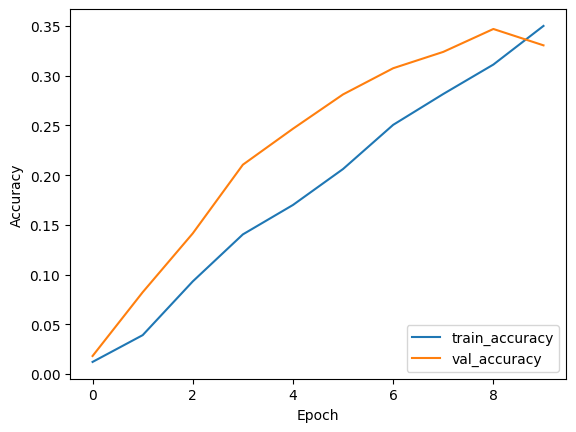

In [18]:

# model with dropout 0.2 and pooling 3x3
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 37s 199ms/step - accuracy: 0.0100 - loss: 4.6257

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - accuracy: 0.0101 - loss: 4.6253 - val_accuracy: 0.0773 - val_loss: 4.1004
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 323ms/step - accuracy: 0.0752 - loss: 4.3103 - val_accuracy: 0.1579 - val_loss: 3.6021
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 406ms/step - accuracy: 0.1885 - loss: 3.6953 - val_accuracy: 0.2385 - val_loss: 3.2636
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 353ms/step - accuracy: 0.2929 - loss: 3.2441 - val_accuracy: 0.2895 - val_loss: 3.1840
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 78s 324ms/step - accuracy: 0.3956 - loss: 2.7717 - val_accuracy: 0.2961 - val_loss: 3.4383
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 58s 345ms/step - accuracy: 0.4499 - loss: 2.5278 - val_accuracy: 0.3010 - val_loss: 3.6568
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 58s 350ms/step - accuracy: 0.4754 - loss: 2.3822 - val_accuracy: 0.3092 - val_loss: 3.7301
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 65s 393ms/step - accuracy: 0.4910 - loss: 2.2841 - val

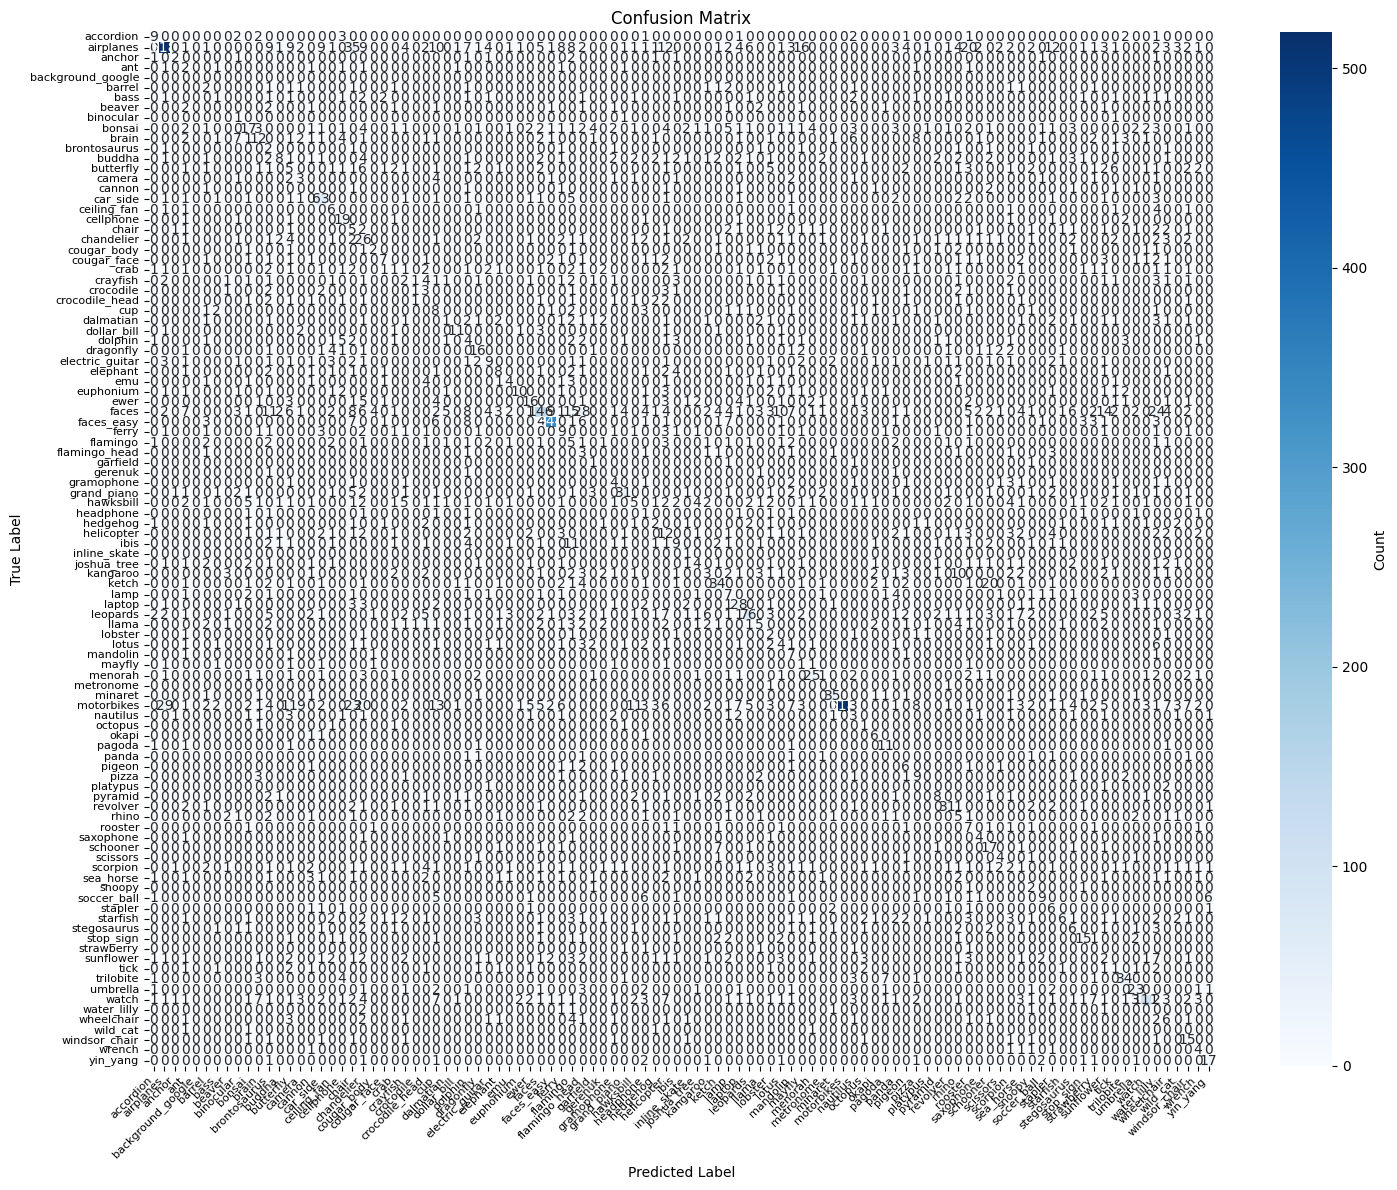

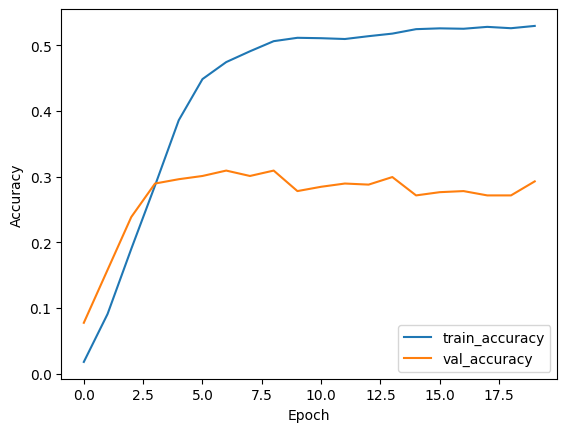

In [19]:

# model with dropout 0.2 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 28s 136ms/step - accuracy: 0.0092 - loss: 4.6246

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.0092 - loss: 4.6243 - val_accuracy: 0.0197 - val_loss: 4.3085
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.0293 - loss: 4.4547 - val_accuracy: 0.0493 - val_loss: 4.0680
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 146ms/step - accuracy: 0.0699 - loss: 4.2344 - val_accuracy: 0.1168 - val_loss: 3.7686
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.0920 - loss: 4.0311 - val_accuracy: 0.1497 - val_loss: 3.6378
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - accuracy: 0.1288 - loss: 3.8610 - val_accuracy: 0.2237 - val_loss: 3.2458
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.1717 - loss: 3.6085 - val_accuracy: 0.2467 - val_loss: 3.0871
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.2048 - loss: 3.4606 - val_accuracy: 0.2812 - val_loss: 2.9758
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.2334 - loss: 3.3237 - val

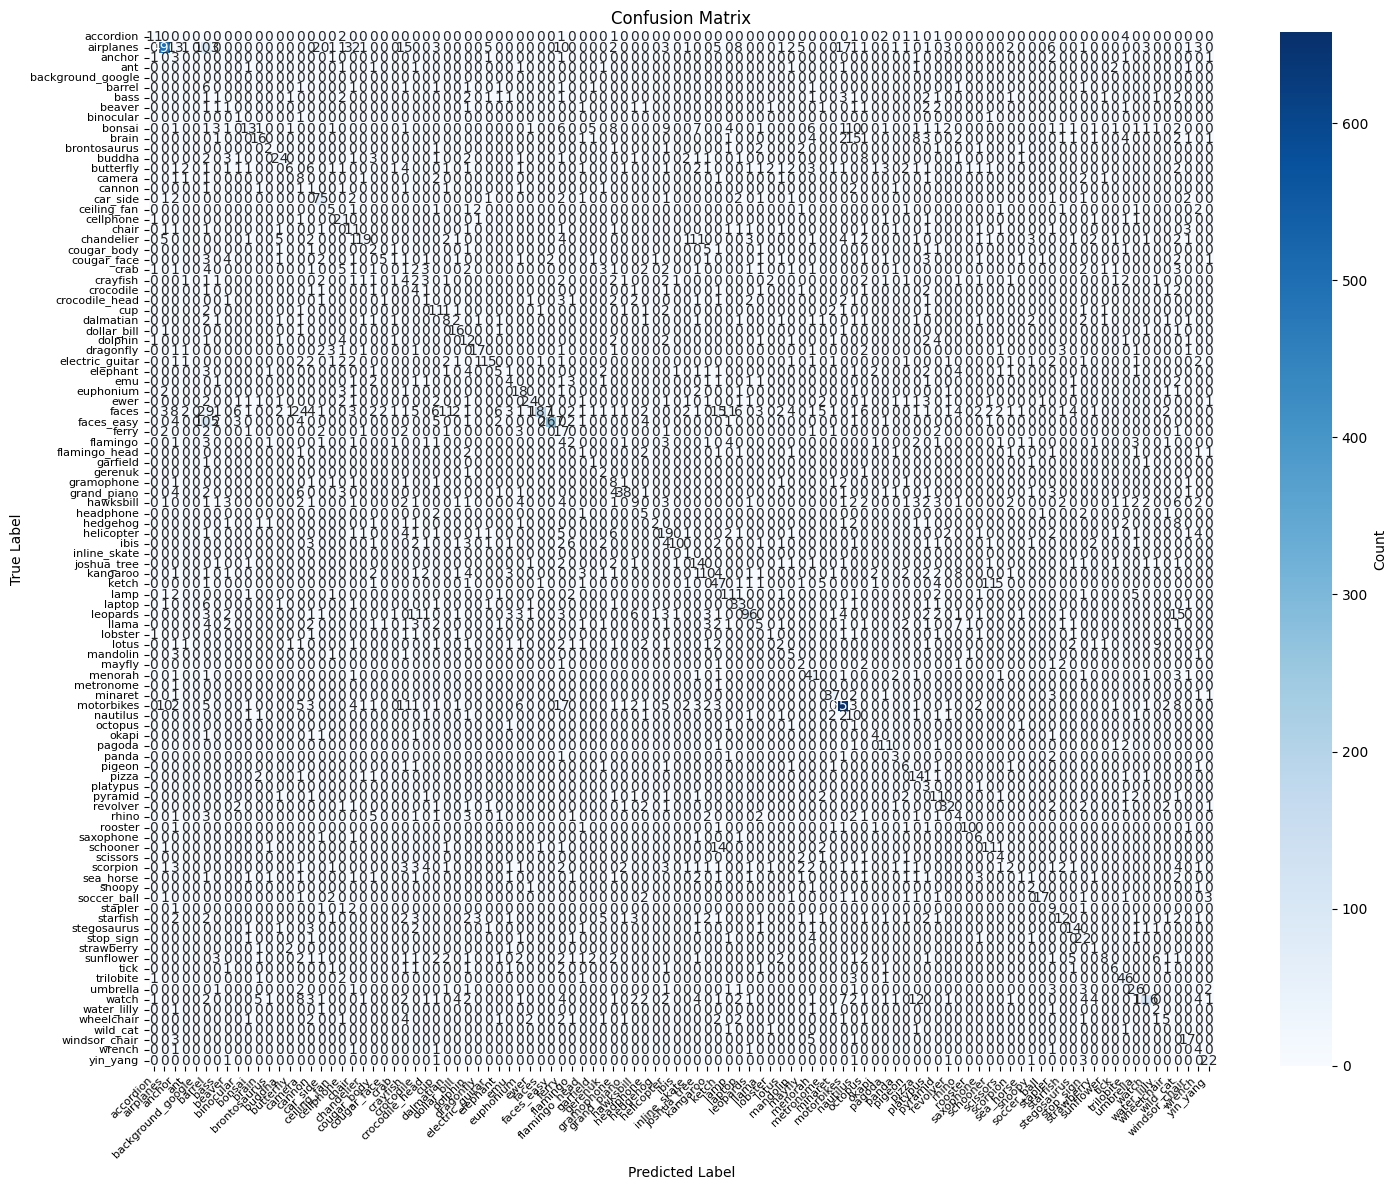

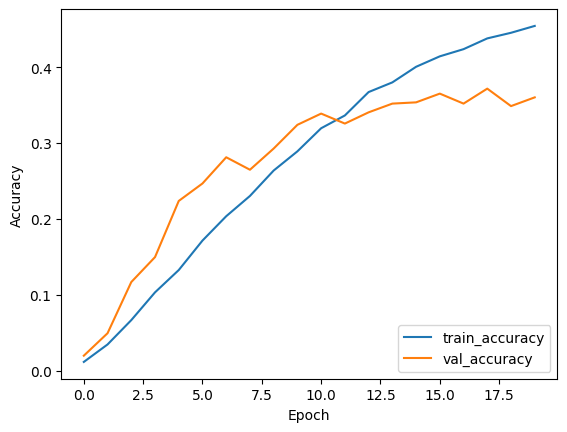

In [20]:
# model with dropout 0.2 and pooling 3x3 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 62s 366ms/step - accuracy: 0.0236 - loss: 5.1339

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.0237 - loss: 5.1317 - val_accuracy: 0.0082 - val_loss: 6.6447
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 269ms/step - accuracy: 0.0895 - loss: 4.2424 - val_accuracy: 0.0115 - val_loss: 11.8787
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 420ms/step - accuracy: 0.1419 - loss: 3.9442 - val_accuracy: 0.0197 - val_loss: 6.9169
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.2023 - loss: 3.6255 - val_accuracy: 0.0757 - val_loss: 4.4686
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 0.2339 - loss: 3.4477 - val_accuracy: 0.1974 - val_loss: 4.5439
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 60s 369ms/step - accuracy: 0.2825 - loss: 3.1806 - val_accuracy: 0.2796 - val_loss: 2.9991
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 57s 350ms/step - accuracy: 0.3351 - loss: 3.0064 - val_accuracy: 0.3355 - val_loss: 2.7763
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 411ms/step - accuracy: 0.3751 - loss: 2.8447 - va

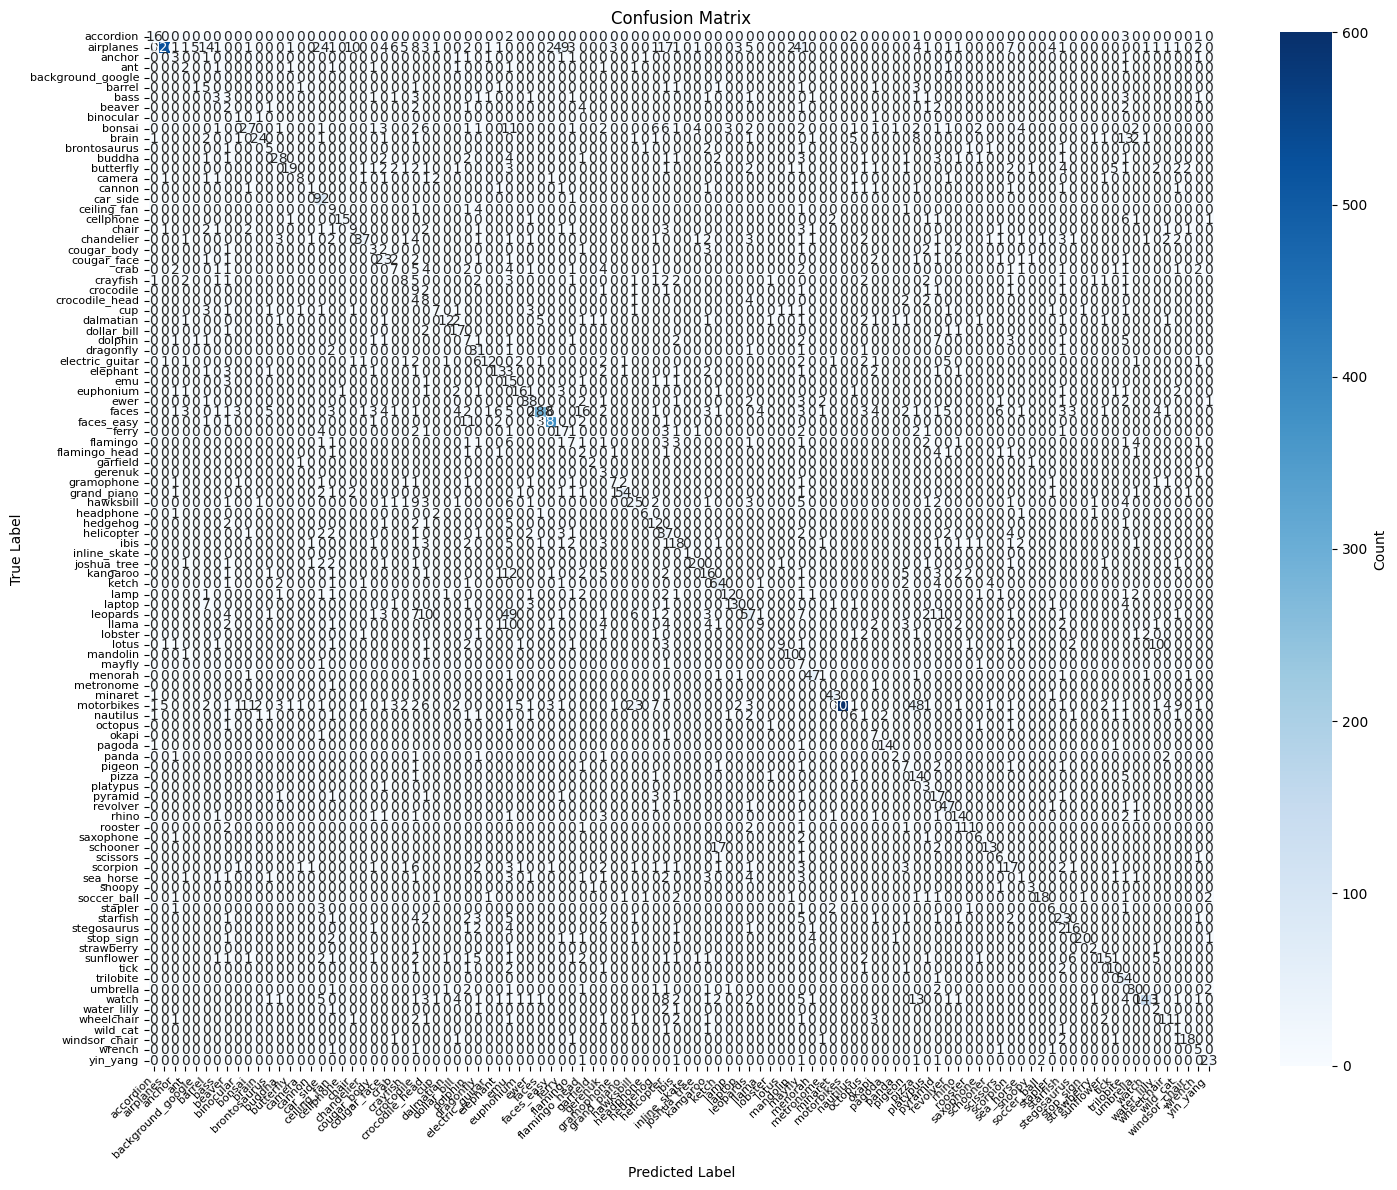

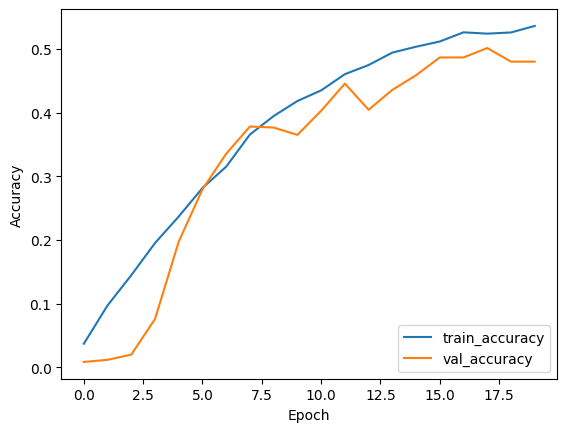

In [21]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

# Compile with a lower learning rate
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 120s 759ms/step - accuracy: 0.0130 - loss: 4.6730

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 124s 786ms/step - accuracy: 0.0130 - loss: 4.6721 - val_accuracy: 0.0461 - val_loss: 4.1614
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 133s 725ms/step - accuracy: 0.0796 - loss: 4.1971 - val_accuracy: 0.1743 - val_loss: 3.6317
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 116s 743ms/step - accuracy: 0.2306 - loss: 3.5079 - val_accuracy: 0.2336 - val_loss: 3.4491
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 100s 632ms/step - accuracy: 0.3767 - loss: 2.8335 - val_accuracy: 0.2286 - val_loss: 3.6521
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 406ms/step - accuracy: 0.4532 - loss: 2.5121 - val_accuracy: 0.2500 - val_loss: 4.1858
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 430ms/step - accuracy: 0.4975 - loss: 2.3192 - val_accuracy: 0.2303 - val_loss: 4.2936
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 74s 475ms/step - accuracy: 0.5151 - loss: 2.1949 - val_accuracy: 0.2220 - val_loss: 4.1808
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 470ms/step - accuracy: 0.5199 - loss: 2.1858 -

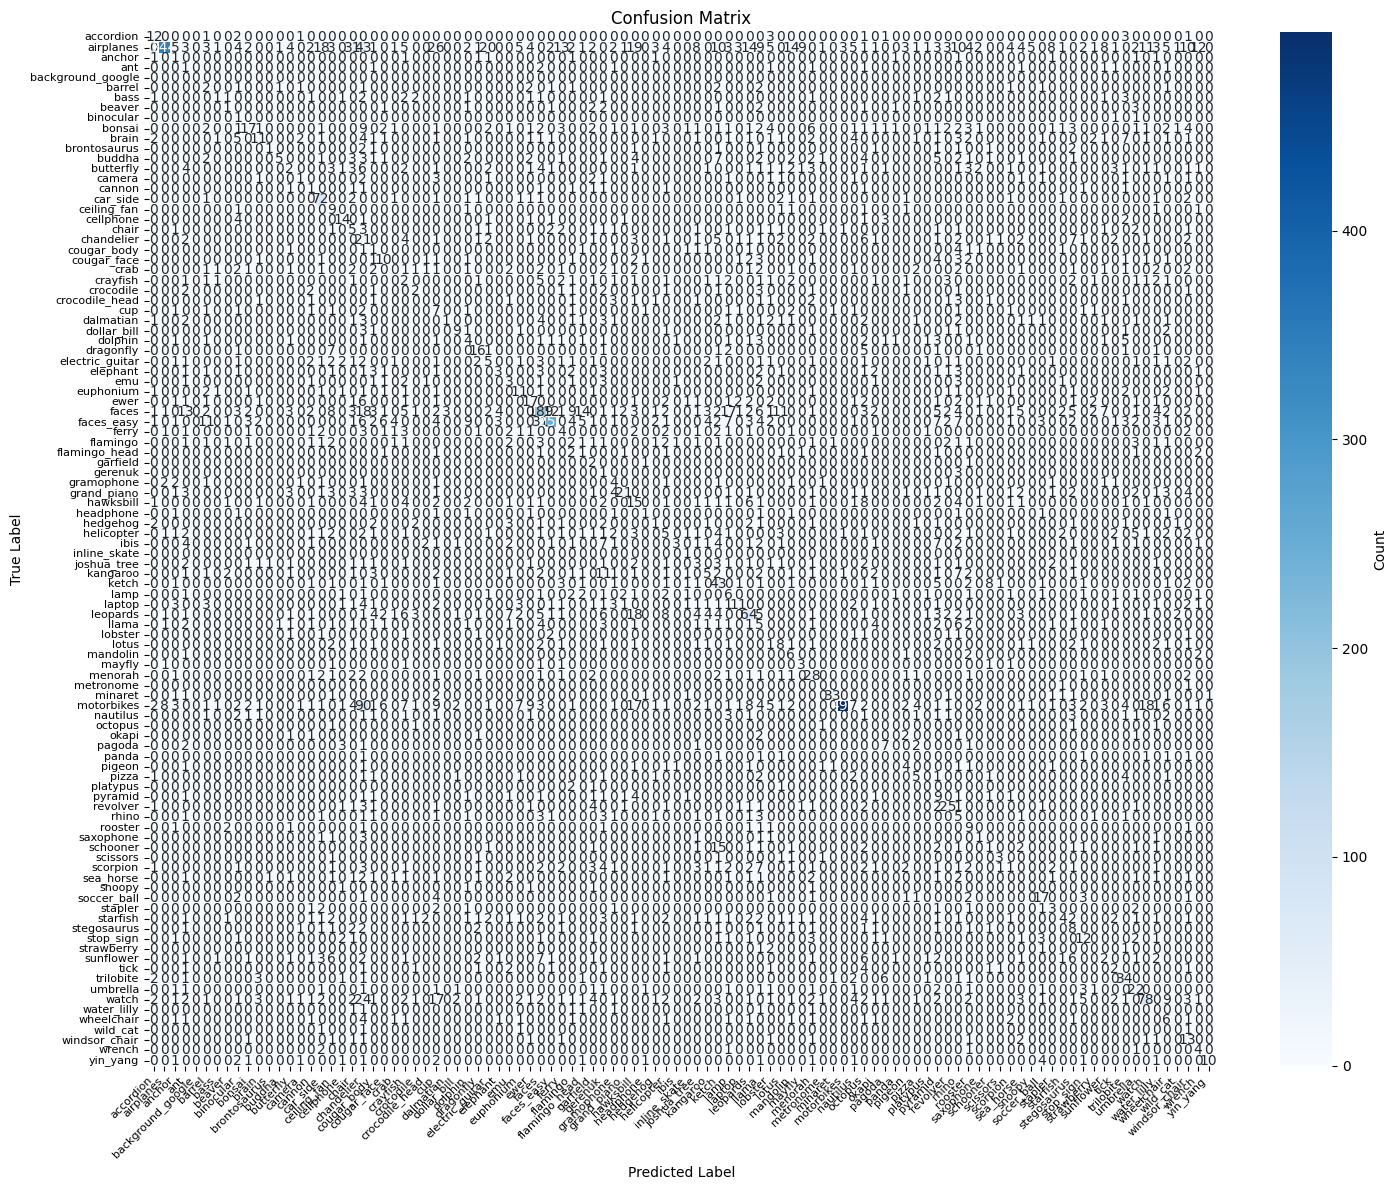

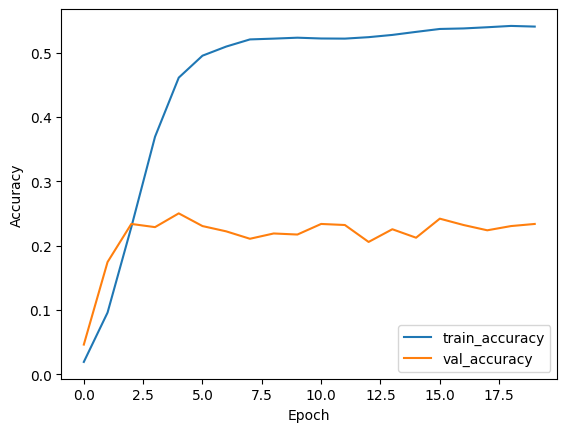

In [22]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 82s 521ms/step - accuracy: 0.0117 - loss: 4.6766

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 534ms/step - accuracy: 0.0118 - loss: 4.6755 - val_accuracy: 0.0839 - val_loss: 3.9750
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 527ms/step - accuracy: 0.1556 - loss: 3.9556 - val_accuracy: 0.2056 - val_loss: 3.4285
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 88s 550ms/step - accuracy: 0.3840 - loss: 2.9710 - val_accuracy: 0.2418 - val_loss: 3.7816
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 87s 543ms/step - accuracy: 0.4896 - loss: 2.3746 - val_accuracy: 0.2418 - val_loss: 3.8747
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 55s 336ms/step - accuracy: 0.5201 - loss: 2.2170 - val_accuracy: 0.2237 - val_loss: 4.1358
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 55s 340ms/step - accuracy: 0.5252 - loss: 2.1656 - val_accuracy: 0.2237 - val_loss: 4.0300
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 55s 342ms/step - accuracy: 0.5247 - loss: 2.1493 - val_accuracy: 0.2303 - val_loss: 4.6861
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 310ms/step - accuracy: 0.5259 - loss: 2.1454 - val

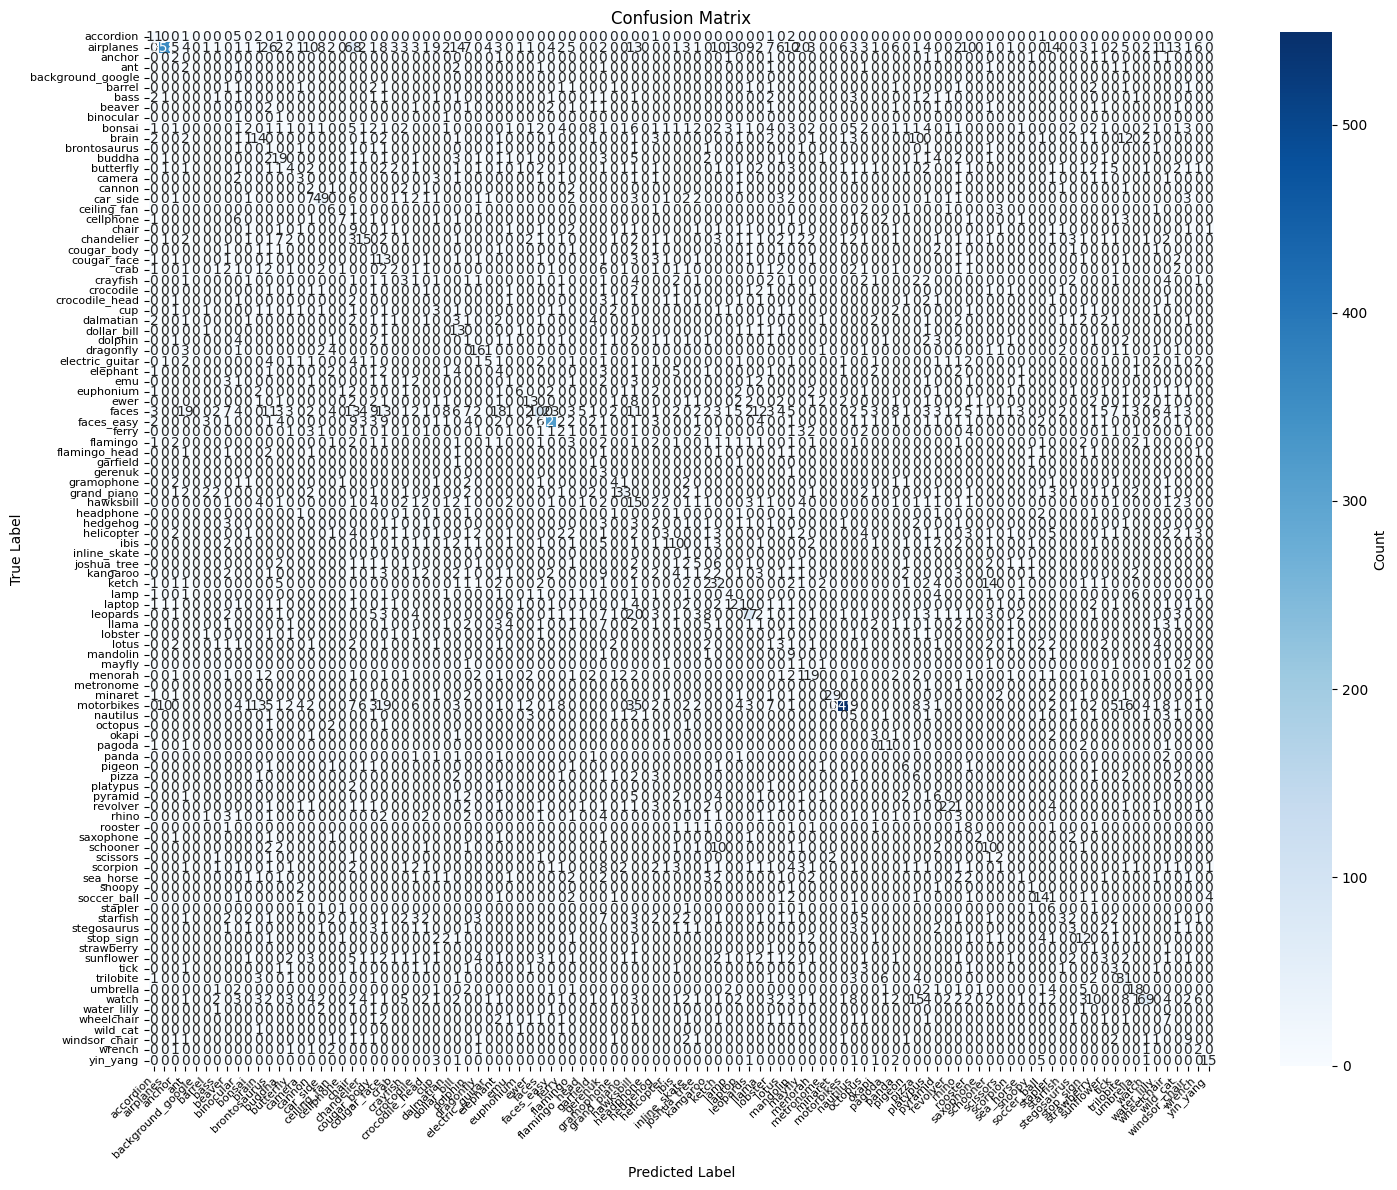

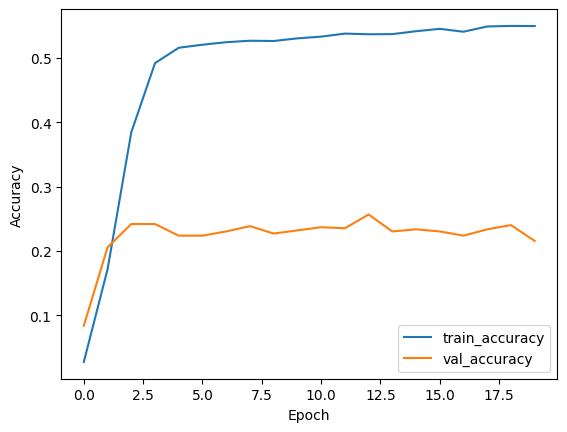

In [23]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 50s 288ms/step - accuracy: 0.0149 - loss: 4.7469

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 298ms/step - accuracy: 0.0149 - loss: 4.7460 - val_accuracy: 0.0132 - val_loss: 4.8597
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 296ms/step - accuracy: 0.0302 - loss: 4.4964 - val_accuracy: 0.0033 - val_loss: 5.7494
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 274ms/step - accuracy: 0.0373 - loss: 4.3998 - val_accuracy: 0.0132 - val_loss: 5.6008
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 275ms/step - accuracy: 0.0376 - loss: 4.3344 - val_accuracy: 0.0099 - val_loss: 5.2318
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 272ms/step - accuracy: 0.0548 - loss: 4.2584 - val_accuracy: 0.0247 - val_loss: 5.1135
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 46s 280ms/step - accuracy: 0.0583 - loss: 4.2036 - val_accuracy: 0.0345 - val_loss: 4.6348
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 47s 288ms/step - accuracy: 0.0643 - loss: 4.1190 - val_accuracy: 0.0312 - val_loss: 4.7485
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 299ms/step - accuracy: 0.0694 - loss: 4.0913 - val

2024-10-30 23:12:04.322296: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step
Accuracy: 21.16%


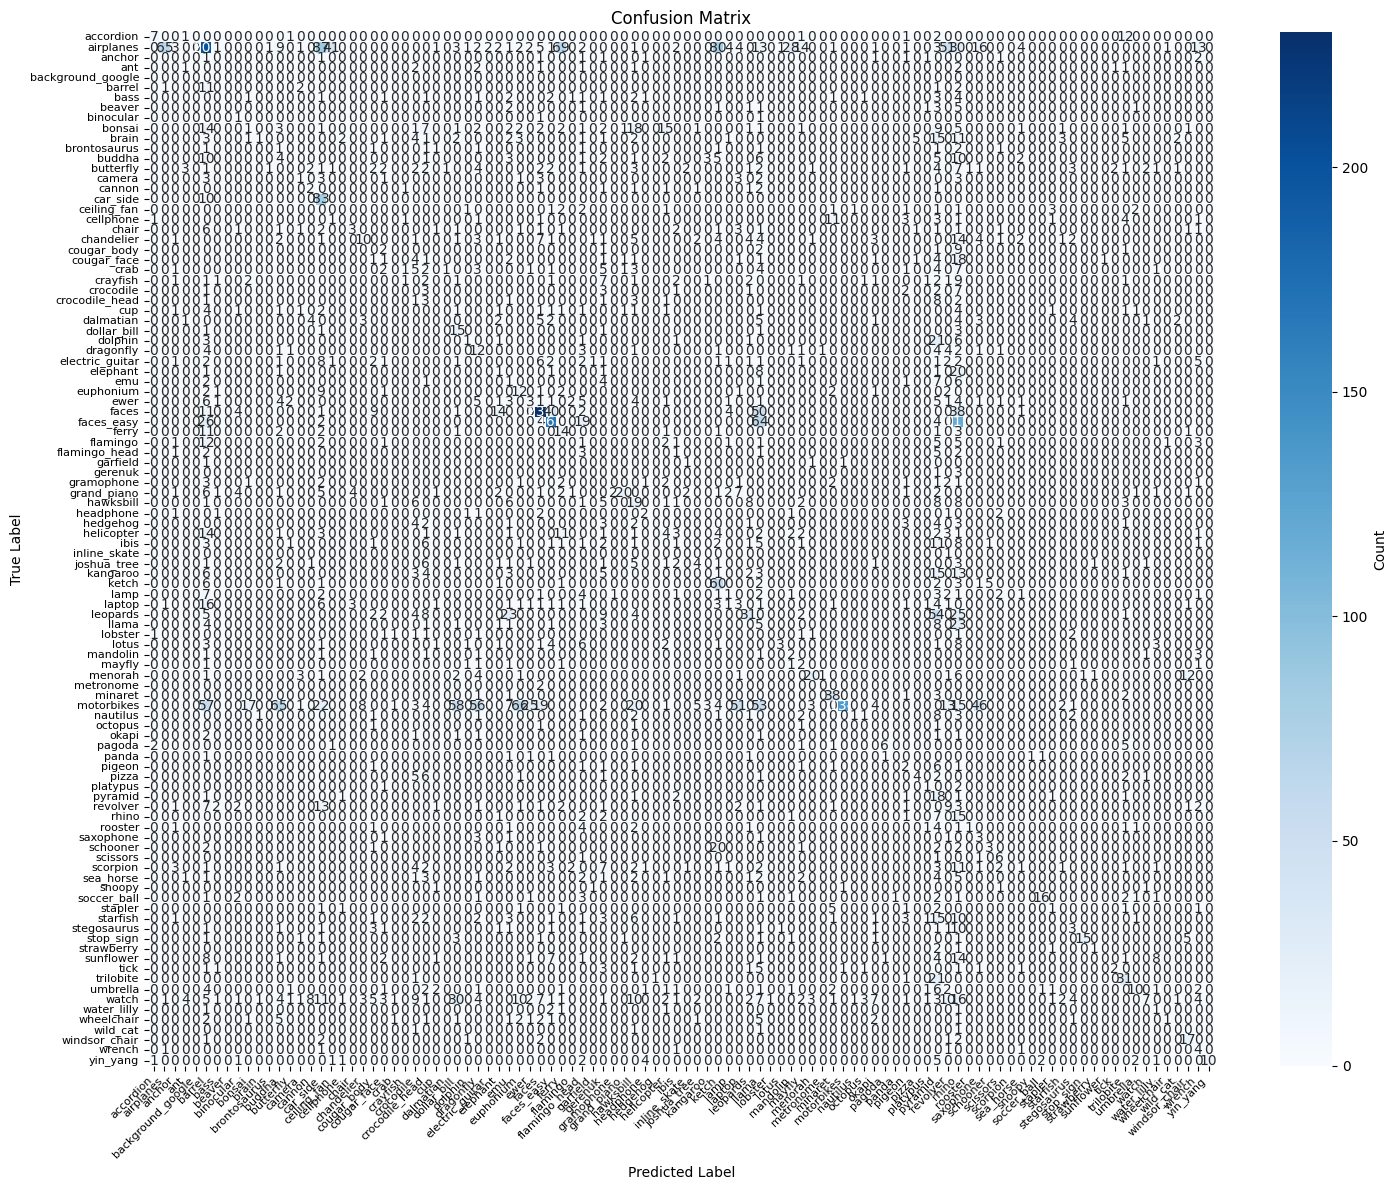

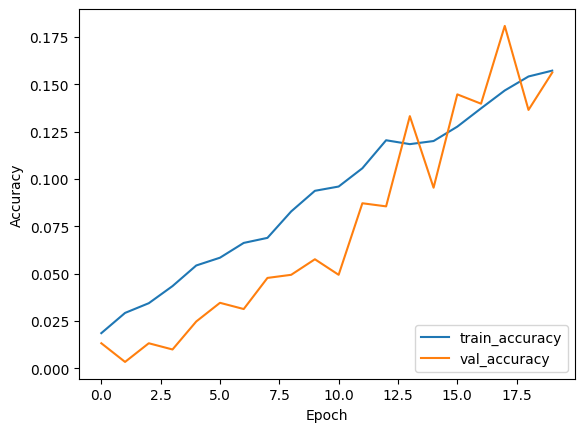

In [24]:
def create_improved_model():
    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Convolutional Block for Deeper Feature Extraction
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global Average Pooling instead of Flattening
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for Dense layer

        # Output Layer
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

# Instantiate and compile the improved model
model = create_improved_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  # Reduced learning rate for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()